In [ ]:
# We import all the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/gdrive'
/content


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Sustainability Datathon/train_extended.csv")
df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Adults,Children,Freight,Infants,Bags,FlightTime,PlannedZeroFuelWeight,PlannedTOW,PlannedTripTime,TeledyneRampWeight
0,181142302,221,SPRZK,197.0,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,EMA-BUD,...,112.0,6.0,0.0,2.0,43.0,137.0,56242.0,62723.0,8246.0,62075.0
1,178908306,3373,9HQEC,189.0,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,TRN-MLA,...,18.0,0.0,0.0,0.0,7.0,102.0,57148.0,63878.0,6227.0,62002.0
2,178886981,2814,9HQCN,189.0,NG,Scheduled Flight,FR,Malta Air,STN-CGN,STN-CGN,...,126.0,5.0,0.0,0.0,19.0,50.0,53620.0,58089.0,3653.0,58029.0
3,180538798,6893,SPRKP,189.0,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,DTM-KTW,...,84.0,5.0,0.0,1.0,8.0,71.0,53396.0,58999.0,4784.0,56070.0
4,178863684,2156,EIDWJ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,BHX-AGP,...,175.0,2.0,0.0,0.0,47.0,155.0,59199.0,68573.0,9275.0,68315.0


In [ ]:
df_test = pd.read_csv("/content/gdrive/My Drive/Sustainability Datathon/test.csv")
df_test.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,ArrivalScheduled,BlockTimeScheduled,Adults,Children,Freight,Infants,Bags
0,181257208,4016,9HQAF,189.0,NG,Scheduled Flight,FR,Malta Air,PSR-BGY,2021-11-25 08:00:00,2021-11-25 09:10:00,70.0,175.0,4.0,0.0,0.0,11.0
1,181195213,2037,EIDPZ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,PMI-DTM,2022-03-18 06:00:00,2022-03-18 08:35:00,155.0,140.0,4.0,0.0,1.0,48.0
2,181128045,5084,EIEBR,189.0,NG,Scheduled Flight,FR,Ryanair DAC,PFO-CHQ,2021-10-29 04:05:00,2021-10-29 05:35:00,90.0,49.0,4.0,0.0,0.0,12.0
3,178889497,2872,EIEMR,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BGY-VNO,2020-01-10 07:55:00,2020-01-10 10:25:00,150.0,134.0,11.0,0.0,0.0,48.0
4,178957284,5178,EIDCP,189.0,NG,Scheduled Flight,FR,Ryanair DAC,STN-BLL,2019-11-22 19:30:00,2019-11-22 21:05:00,95.0,172.0,9.0,0.0,3.0,50.0


Firstly, we are going to check the type of each variable.

In [ ]:
df.dtypes

FlightID                   int64
FlightNumber               int64
AircraftRegistration      object
AircraftCapacity         float64
AircraftTypeGroup         object
ServiceDescription        object
Carrier                   object
AOCDescription            object
ScheduledRoute            object
ActualRoute               object
DepartureScheduled        object
ArrivalScheduled          object
DepartureActual           object
ArrivalActual             object
BlockTimeScheduled       float64
BlockTime                float64
TaxiOut                  float64
Burnoff                  float64
Adults                   float64
Children                 float64
Freight                  float64
Infants                  float64
Bags                     float64
FlightTime               float64
PlannedZeroFuelWeight    float64
PlannedTOW               float64
PlannedTripTime          float64
TeledyneRampWeight       float64
dtype: object

We decided to change the variables that are float and should be integer (as aircraft capacity) to integers.

In [ ]:
df['AircraftCapacity'] = df['AircraftCapacity'].astype('int')
df['Adults'] = df['Adults'].astype('int')
df['Infants'] = df['Infants'].astype('int')
df['Children'] = df['Children'].astype('int')
df['Bags'] = df['Bags'].astype('int')

df['DepartureScheduled'] = pd.to_datetime(df.DepartureScheduled)
df['ArrivalScheduled'] = pd.to_datetime(df.ArrivalScheduled)
df['DepartureActual'] = pd.to_datetime(df.DepartureActual)
df['ArrivalActual'] = pd.to_datetime(df.ArrivalActual)

df.dtypes

FlightID                          int64
FlightNumber                      int64
AircraftRegistration             object
AircraftCapacity                  int64
AircraftTypeGroup                object
ServiceDescription               object
Carrier                          object
AOCDescription                   object
ScheduledRoute                   object
ActualRoute                      object
DepartureScheduled       datetime64[ns]
ArrivalScheduled         datetime64[ns]
DepartureActual          datetime64[ns]
ArrivalActual            datetime64[ns]
BlockTimeScheduled              float64
BlockTime                       float64
TaxiOut                         float64
Burnoff                         float64
Adults                            int64
Children                          int64
Freight                         float64
Infants                           int64
Bags                              int64
FlightTime                      float64
PlannedZeroFuelWeight           float64


Now, that we have checked every single variable, we decided to rename columns to indicate the magnitude in which each varibale is.

Also, even though in the information about the variables it was established that Burnoff is in kg/h, we have checked that is should be the total burnoff of the flight in kg.

In [ ]:
df = df.rename(columns = {'BlockTimeScheduled' : 'BlockTimeScheduled_in_min'})
df = df.rename(columns = {'BlockTime' : 'BlockTime_in_min'})
df = df.rename(columns = {'TaxiOut' : 'TaxiOut_in_min'})
df = df.rename(columns = {'Burnoff' : 'Burnoff_in_kg'})
df = df.rename(columns = {'Burnoff' : 'Burnoff_in_kg'})
df = df.rename(columns = {'Freight' : 'Freight_in_kg'})
df = df.rename(columns = {'FlightTime' : 'FlightTime_in_min'})
df = df.rename(columns = {'PlannedZeroFuelWeight' : 'PlannedZeroFuelWeight_in_kg'})
df = df.rename(columns = {'PlannedTOW' : 'PlannedTOW_in_kg'})
df = df.rename(columns = {'PlannedTripTime' : 'PlannedTripTime_in_min'})
df = df.rename(columns = {'TeledyneRampWeight' : 'TeledyneRampWeight_in_kg'})

df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Adults,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg
0,181142302,221,SPRZK,197,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,EMA-BUD,...,112,6,0.0,2,43,137.0,56242.0,62723.0,8246.0,62075.0
1,178908306,3373,9HQEC,189,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,TRN-MLA,...,18,0,0.0,0,7,102.0,57148.0,63878.0,6227.0,62002.0
2,178886981,2814,9HQCN,189,NG,Scheduled Flight,FR,Malta Air,STN-CGN,STN-CGN,...,126,5,0.0,0,19,50.0,53620.0,58089.0,3653.0,58029.0
3,180538798,6893,SPRKP,189,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,DTM-KTW,...,84,5,0.0,1,8,71.0,53396.0,58999.0,4784.0,56070.0
4,178863684,2156,EIDWJ,189,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,BHX-AGP,...,175,2,0.0,0,47,155.0,59199.0,68573.0,9275.0,68315.0


We also want to know the number of rows and columns.

In [ ]:
df.shape

(765236, 28)

765236 rows.
28 columns.

We are going to check wrong data in the df. First, we are going to check data in which FlightTime is more than BlockTime (which is not possible).

In [ ]:
df[df['FlightTime_in_min'] > df['BlockTime_in_min']]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Adults,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg
7452,181201210,2170,EIENK,189,NG,Scheduled Flight,FR,Ryanair DAC,SKG-BTS,SKG-BTS,...,76,7,0.0,0,9,153.0,51117.0,61493.0,5712.0,60188.0
11697,180915290,8076,EIEBC,189,NG,Scheduled Flight,FR,Ryanair DAC,RAK-CRL,RAK-CRL,...,71,4,0.0,3,37,246.0,50727.0,60549.0,11859.0,58955.0
19456,178826492,1302,EIEFN,189,NG,Scheduled Flight,FR,Ryanair DAC,CRL-NAP,CRL-NAP,...,162,8,0.0,0,22,171.0,58632.0,66590.0,7146.0,65394.0
20129,180927344,8411,SPRKR,189,NG,Scheduled Flight,FR,Ryanair Sun,BUD-BGY,BUD-BGY,...,151,3,0.0,0,25,133.0,56858.0,62637.0,4803.0,62202.0
38746,180510122,5262,9HQBV,189,NG,Scheduled Flight,FR,Malta Air,SVQ-BVA,SVQ-BVA,...,52,3,0.0,0,21,188.0,50877.0,58852.0,8113.0,55998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755205,181140451,194,9HVUL,197,Max,Scheduled Flight,FR,Malta Air,STN-BLQ,STN-BLQ,...,125,3,0.0,0,35,158.0,59753.0,68050.0,6451.0,64796.0
758394,181331143,6018,9HQBK,189,NG,Scheduled Flight,FR,Malta Air,BLQ-ATH,BLQ-ATH,...,160,11,0.0,1,33,167.0,57911.0,65609.0,6832.0,64904.0
758571,180931297,8570,9HQAC,189,NG,Scheduled Flight,FR,Malta Air,BDS-MXP,BDS-MXP,...,141,3,0.0,1,42,1527.0,56518.0,63728.0,6576.0,62310.0
759797,181270174,4327,9HQDQ,189,NG,Scheduled Flight,FR,Malta Air,BLQ-BRI,BLQ-BRI,...,126,5,0.0,0,11,117.0,54271.0,58950.0,3806.0,58029.0


In [ ]:
df = df.drop(df[df['FlightTime_in_min'] > df['BlockTime_in_min']].index)

In [ ]:
df[df['FlightTime_in_min'] > df['BlockTime_in_min']]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Adults,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg


As we see, now we have remove these rows

We also want to check if there are rows where FlightTime + TaxiOut is bigger than BlockTime

In [ ]:
df[(df['FlightTime_in_min']+ df['TaxiOut_in_min']) > df['BlockTime_in_min']].head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Adults,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg
12842,180578690,8734,9HQCB,189,NG,Scheduled Flight,FR,Malta Air,MXP-OTP,MXP-OTP,...,161,6,0.0,1,68,116.0,58621.0,65568.0,7107.0,55726.0
23955,180676770,4673,9HQBP,189,NG,Scheduled Flight,FR,Malta Air,BGY-AGP,BGY-AGP,...,156,3,0.0,5,79,139.0,58368.0,66806.0,8537.0,65830.0
36287,181157235,808,EIDPF,189,NG,Scheduled Flight,FR,Ryanair DAC,NOC-STN,NOC-STN,...,157,5,0.0,0,14,64.0,56558.0,61809.0,4065.0,62292.0
45874,181387830,7708,9HQCS,189,NG,Scheduled Flight,FR,Malta Air,MRS-TUF,MRS-TUF,...,148,5,0.0,2,27,66.0,56743.0,64261.0,4194.0,63798.0
47757,179895819,2594,EIDYB,189,NG,Scheduled Flight,FR,Ryanair DAC,SDR-AGP,SDR-AGP,...,95,3,0.0,0,13,68.0,52344.0,57841.0,4637.0,56088.0


In [ ]:
df = df.drop(df[(df['FlightTime_in_min']+ df['TaxiOut_in_min']) > df['BlockTime_in_min']].index)

In [ ]:
df[(df['FlightTime_in_min']+ df['TaxiOut_in_min']) > df['BlockTime_in_min']].head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Adults,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg


Here we deleted the rows where FlightTime_in_min + TaxiOut_in_min is bigger than BlockTime_in_min


We also believe that another column might be interesting: Taxi_In. That is why we have added.

In [ ]:
df['TaxiIn_in_min'] = df['BlockTime_in_min'] - df['FlightTime_in_min'] - df['TaxiOut_in_min']
df

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
0,181142302,221,SPRZK,197,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,EMA-BUD,...,6,0.0,2,43,137.0,56242.0,62723.0,8246.0,62075.0,3.0
1,178908306,3373,9HQEC,189,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,TRN-MLA,...,0,0.0,0,7,102.0,57148.0,63878.0,6227.0,62002.0,4.0
2,178886981,2814,9HQCN,189,NG,Scheduled Flight,FR,Malta Air,STN-CGN,STN-CGN,...,5,0.0,0,19,50.0,53620.0,58089.0,3653.0,58029.0,6.0
3,180538798,6893,SPRKP,189,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,DTM-KTW,...,5,0.0,1,8,71.0,53396.0,58999.0,4784.0,56070.0,6.0
4,178863684,2156,EIDWJ,189,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,BHX-AGP,...,2,0.0,0,47,155.0,59199.0,68573.0,9275.0,68315.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765231,180266656,9852,EIENM,189,NG,Scheduled Flight,FR,Ryanair DAC,ORK-LGW,ORK-LGW,...,2,0.0,1,30,58.0,53763.0,58430.0,3771.0,55018.0,7.0
765232,180731656,1237,EIENM,189,NG,Scheduled Flight,FR,Ryanair DAC,JTR-ATH,JTR-ATH,...,2,0.0,1,30,27.0,58871.0,63911.0,2107.0,61766.0,4.0
765233,181168643,1183,EIEBM,189,NG,Scheduled Flight,FR,Ryanair DAC,LGW-SNN,LGW-SNN,...,3,0.0,1,30,70.0,57933.0,63391.0,4249.0,62583.0,2.0
765234,181143874,297,EIEVI,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-DUB,STN-DUB,...,7,0.0,1,15,56.0,54651.0,59375.0,3472.0,54710.0,6.0


We have some doubts about the meaning of the time-related variables, so we want to check what each of them means by comparing them.

In [ ]:
df[['BlockTimeScheduled_in_min', 'BlockTime_in_min', 'TaxiOut_in_min', 'FlightTime_in_min', 'PlannedTripTime_in_min']].head()

,BlockTimeScheduled_in_min,BlockTime_in_min,TaxiOut_in_min,FlightTime_in_min,PlannedTripTime_in_min
0,155.0,152.0,12.0,137.0,8246.0
1,120.0,114.0,8.0,102.0,6227.0
2,75.0,66.0,10.0,50.0,3653.0
3,90.0,84.0,7.0,71.0,4784.0
4,165.0,170.0,12.0,155.0,9275.0


*Check* if there are any duplicate rows in the data.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 29)

There are not any duplicated rows.

Check for null values

In [ ]:
df.isnull().sum()

FlightID                       0
FlightNumber                   0
AircraftRegistration           0
AircraftCapacity               0
AircraftTypeGroup              0
ServiceDescription             0
Carrier                        0
AOCDescription                 0
ScheduledRoute                 0
ActualRoute                    0
DepartureScheduled             0
ArrivalScheduled               0
DepartureActual                0
ArrivalActual                  0
BlockTimeScheduled_in_min      0
BlockTime_in_min               0
TaxiOut_in_min                 0
Burnoff_in_kg                  0
Adults                         0
Children                       0
Freight_in_kg                  0
Infants                        0
Bags                           0
FlightTime_in_min              0
PlannedZeroFuelWeight_in_kg    0
PlannedTOW_in_kg               0
PlannedTripTime_in_min         0
TeledyneRampWeight_in_kg       0
TaxiIn_in_min                  0
dtype: int64

In [ ]:
(df == 0).sum()

FlightID                            0
FlightNumber                        0
AircraftRegistration                0
AircraftCapacity                    0
AircraftTypeGroup                   0
ServiceDescription                  0
Carrier                             0
AOCDescription                      0
ScheduledRoute                      0
ActualRoute                         0
DepartureScheduled                  0
ArrivalScheduled                    0
DepartureActual                     0
ArrivalActual                       0
BlockTimeScheduled_in_min           0
BlockTime_in_min                    0
TaxiOut_in_min                    110
Burnoff_in_kg                       1
Adults                            951
Children                        67541
Freight_in_kg                  733136
Infants                        320815
Bags                                0
FlightTime_in_min                  28
PlannedZeroFuelWeight_in_kg         0
PlannedTOW_in_kg                    0
PlannedTripT

In [ ]:
df[df['TaxiOut_in_min'].eq(0)].head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
7530,178964516,5462,EIEMP,189,NG,Scheduled Flight,FR,Ryanair DAC,MAD-CRL,MAD-CRL,...,1,2.0,0,8,120.0,50049.0,56278.0,6746.0,57358.0,5.0
18814,178946707,4845,EIGXI,189,NG,Scheduled Flight,FR,Ryanair DAC,BGY-DUB,BGY-DUB,...,18,0.0,0,91,147.0,57969.0,66762.0,9524.0,67045.0,8.0
39568,179031713,8119,EIENW,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-NUE,STN-NUE,...,8,0.0,3,62,86.0,59134.0,68140.0,4857.0,67027.0,4.0
44829,178963899,5382,EIDPC,189,NG,Scheduled Flight,FR,Ryanair DAC,MAD-MLA,MAD-MLA,...,3,0.0,2,40,155.0,58959.0,69818.0,8544.0,68750.0,3.0
47513,179082199,9241,EIDPY,189,NG,Scheduled Flight,FR,Ryanair DAC,PSA-GRO,PSA-GRO,...,3,0.0,1,39,68.0,55496.0,60931.0,4287.0,60714.0,3.0


In [ ]:
df[df['FlightTime_in_min'].eq(0)].head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
2857,178978114,6105,EIDWZ,189,NG,Scheduled Flight,FR,Ryanair DAC,CRL-CIA,CRL-CIA,...,5,0.0,0,23,0.0,58065.0,65191.0,6593.0,65503.0,102.0
18590,179755181,195,9HQCR,189,NG,Scheduled Flight,FR,Malta Air,BLQ-STN,BLQ-STN,...,10,0.0,2,30,0.0,51163.0,57954.0,7231.0,57794.0,122.0
30824,181075320,8829,9HQBP,189,NG,Scheduled Flight,FR,Malta Air,VCE-BDS,VCE-BDS,...,9,0.0,1,24,0.0,57193.0,61988.0,4122.0,61494.0,67.0
37378,178776616,58,EIENF,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-NYO,STN-NYO,...,6,100.0,1,16,0.0,58582.0,65803.0,6630.0,64433.0,3.0
60727,179087453,137,OELOU,180,Airbus,Scheduled Flight,OE,Lauda Motion,BHX-VIE,BHX-VIE,...,16,715.0,1,55,0.0,57626.0,64653.0,6621.0,63666.0,116.0


In [ ]:
df[df['Burnoff_in_kg'].eq(0)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
190111,181153187,665,EIDLE,189,NG,Scheduled Flight,FR,Ryanair DAC,BHX-DUB,BHX-DUB,...,4,0.0,0,26,46.0,57258.0,61790.0,2735.0,60315.0,5.0


In [ ]:
df[df['TaxiIn_in_min'].eq(0)].head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
5423,178840635,1670,EIDPZ,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-BUD,STN-BUD,...,0,0.0,1,21,131.0,58190.0,68045.0,7567.0,57014.0,0.0
6574,178975392,6004,EIEPA,189,NG,Scheduled Flight,FR,Ryanair DAC,BES-MRS,BES-MRS,...,19,0.0,2,30,95.0,58262.0,64881.0,5565.0,64197.0,0.0
8803,178861297,2105,EIDLX,189,NG,Scheduled Flight,FR,Ryanair DAC,CRL-TLS,CRL-TLS,...,1,0.0,1,22,81.0,53205.0,62611.0,5140.0,62619.0,0.0
17940,178820991,1124,EIGSK,189,NG,Scheduled Flight,FR,Ryanair DAC,VLC-RAK,VLC-RAK,...,8,0.0,3,57,105.0,58435.0,69025.0,6281.0,68913.0,0.0
18718,179050732,8556,EIFZK,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-SXF,DUB-SXF,...,3,0.0,0,23,112.0,58312.0,69598.0,7142.0,68641.0,0.0


As we can see, there are some strange data in our df. There are 0 values in the columns 'Burnoff_in_kg', 'FlightTime_in_min', 'TaxiOut_in_min' and 'TaxiIn_in_min' that don't make sense.

In [ ]:
df = df.drop(df[df['Burnoff_in_kg'] == 0].index)

In [ ]:
df = df.drop(df[df['FlightTime_in_min'] == 0].index)

In [ ]:
df = df.drop(df[df['TaxiOut_in_min'] == 0].index)

In [ ]:
df = df.drop(df[df['TaxiIn_in_min'] == 0].index)

We have remove these rows with zeros as you can see in the following cell.

In [ ]:
(df == 0).sum()

FlightID                            0
FlightNumber                        0
AircraftRegistration                0
AircraftCapacity                    0
AircraftTypeGroup                   0
ServiceDescription                  0
Carrier                             0
AOCDescription                      0
ScheduledRoute                      0
ActualRoute                         0
DepartureScheduled                  0
ArrivalScheduled                    0
DepartureActual                     0
ArrivalActual                       0
BlockTimeScheduled_in_min           0
BlockTime_in_min                    0
TaxiOut_in_min                      0
Burnoff_in_kg                       0
Adults                            950
Children                        67498
Freight_in_kg                  732771
Infants                        320648
Bags                                0
FlightTime_in_min                   0
PlannedZeroFuelWeight_in_kg         0
PlannedTOW_in_kg                    0
PlannedTripT

In [ ]:
df.shape

(764694, 29)

We decided to drop this rows because they didn't represent an extensive part of the dataset and the fact that they were equal to cero was wrong.

We are going to check if there are some wrong values related to capacity and the number of passengers in each flight.

In [ ]:
passengers = df['Adults'] + df['Children']
df[df['AircraftCapacity'] < passengers]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
1882,181340149,6362,EIENS,189,NG,Scheduled Flight,FR,Ryanair DAC,BCN-PMI,BCN-PMI,...,42,0.0,0,4,30.0,57638.0,63802.0,2062.0,63127.0,6.0
4139,180856464,5702,9HQDQ,189,NG,Scheduled Flight,FR,Malta Air,HHN-FEZ,HHN-FEZ,...,41,0.0,4,133,181.0,57728.0,71270.0,11522.0,69294.0,3.0
8242,181326598,5936,9HQCE,189,NG,Scheduled Flight,FR,Malta Air,MXP-NAP,MXP-NAP,...,41,0.0,0,11,66.0,57964.0,63834.0,4486.0,63272.0,4.0
11820,178784780,130,EIEVA,189,NG,Scheduled Flight,FR,Ryanair DAC,CGN-OPO,CGN-OPO,...,25,0.0,2,76,151.0,58973.0,68251.0,9314.0,68405.0,4.0
14050,179011124,7072,EIFOO,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-OPO,DUB-OPO,...,10,0.0,0,66,123.0,58066.0,66019.0,7837.0,66319.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755913,179045543,8405,SPRSH,189,NG,Scheduled Flight,FR,Ryanair Sun,STN-WRO,STN-WRO,...,25,0.0,1,53,98.0,57389.0,64063.0,6240.0,64215.0,3.0
758353,178885549,2758,EIDYR,189,NG,Scheduled Flight,FR,Ryanair DAC,MXP-MAD,MXP-MAD,...,17,0.0,2,55,111.0,57991.0,66324.0,6638.0,66718.0,13.0
761993,178877923,2591,EIDPX,189,NG,Scheduled Flight,FR,Ryanair DAC,AGP-SXF,AGP-SXF,...,41,0.0,0,47,190.0,58589.0,70264.0,12216.0,70020.0,7.0
764037,181043757,3209,EIDPG,189,NG,Scheduled Flight,FR,Ryanair DAC,AGP-MAN,AGP-MAN,...,93,0.0,1,54,147.0,58102.0,67273.0,9510.0,62292.0,5.0


In [ ]:
df = df.drop(df[df['AircraftCapacity'] < passengers].index)

In [ ]:
passengers = df['Adults'] + df['Children']
df[df['AircraftCapacity'] < passengers]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
df.shape

(764369, 29)

We have dropped the rows in which the number of passengers was bigger than the capacity of the plane

To understand a little more some variables, we will print the unique values of some columns.

In [ ]:
df["AircraftCapacity"].unique()

array([197, 189, 180, 148])

In [ ]:
df["AircraftTypeGroup"].unique()

array(['Max', 'NG', 'Airbus'], dtype=object)

In [ ]:
df["ServiceDescription"].unique()

array(['Scheduled Flight', 'Charter Flight',
       'Charter Flight (Tour Operator)', 'Positioning Flight'],
      dtype=object)

In [ ]:
df["Carrier"].unique()
# We have investigated and these are the IATA codes of the different companies of Ryanair.
# FR = Ryanair, RR = Buzz Air, RK = Ryanair UK, OE = Lauda Motion

array(['FR', 'RR', 'RK', 'OE'], dtype=object)

In [ ]:
# 6 AOCDescription related to Carrier
df["AOCDescription"].unique()

array(['Ryanair Sun', 'Malta Air', 'Ryanair DAC', 'Lauda Motion Europe',
       'Lauda Motion', 'Ryanair UK'], dtype=object)

Additionally, to understand even more these variables, we do some more research in the following steps.

In [ ]:
# To check number of flight per type of flight.
df.groupby(df['ServiceDescription'])['FlightID'].count()

ServiceDescription
Charter Flight                      2982
Charter Flight (Tour Operator)       254
Positioning Flight                    46
Scheduled Flight                  761087
Name: FlightID, dtype: int64

In [ ]:
# To check passengers in these flights and confirm what this type of flight is.
# Only 46 flights in the df.
df[df['ServiceDescription'].eq('Positioning Flight')]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
10435,181473291,416,EIENS,189,NG,Positioning Flight,FR,Ryanair DAC,CHQ-MAD,CHQ-MAD,...,0,0.0,0,24,238.0,43010.0,54312.0,14536.0,55853.0,17.0
10766,181474334,16,9HLOU,180,Airbus,Positioning Flight,FR,Lauda Motion Europe,ZAD-VIE,ZAD-VIE,...,0,0.0,0,16,49.0,43262.0,47240.0,3139.0,47137.0,4.0
13003,179120423,21,EIDYL,189,NG,Positioning Flight,FR,Ryanair DAC,TLS-CRL,TLS-CRL,...,0,0.0,0,24,90.0,60321.0,66607.0,5211.0,49395.0,5.0
134072,180315736,407,EIGXK,189,NG,Positioning Flight,FR,Ryanair DAC,DUB-SVQ,DUB-SVQ,...,0,0.0,0,1,154.0,42345.0,49466.0,9303.0,48869.0,3.0
134867,183129154,24,EIDLX,189,NG,Positioning Flight,FR,Ryanair DAC,STN-BVA,STN-BVA,...,0,38.0,0,1,41.0,42290.0,46251.0,3418.0,49395.0,4.0
148515,180369641,150,OELMC,180,Airbus,Positioning Flight,FR,Lauda Motion,FUE-VIE,FUE-VIE,...,0,100.0,0,4,260.0,61146.0,75500.0,15460.0,60909.0,9.0
181407,180655098,7350,9HLMG,180,Airbus,Positioning Flight,FR,Lauda Motion Europe,STN-VIE,STN-VIE,...,0,0.0,0,2,97.0,42854.0,48395.0,6306.0,48407.0,7.0
184975,181482964,45,9HQBJ,189,NG,Positioning Flight,FR,Malta Air,CIA-FCO,CIA-FCO,...,0,0.0,0,1,13.0,42260.0,45541.0,1745.0,45930.0,9.0
198433,180380554,70,EISEV,148,NG,Positioning Flight,FR,Ryanair DAC,STN-PIK,STN-PIK,...,0,0.0,0,8,53.0,53618.0,58183.0,3609.0,45948.0,5.0
205001,179161732,52,EIEBP,189,NG,Positioning Flight,FR,Ryanair DAC,AMM-BLQ,AMM-BLQ,...,0,0.0,0,31,226.0,43725.0,54335.0,14313.0,74283.0,5.0


In [ ]:
# To check number of flights per AOCDescription
df.groupby(df["AOCDescription"])['FlightID'].count()

AOCDescription
Lauda Motion             5434
Lauda Motion Europe     20601
Malta Air              215651
Ryanair DAC            441239
Ryanair Sun             77895
Ryanair UK               3549
Name: FlightID, dtype: int64

In [ ]:
# To check number of flights per Carrier
df.groupby(df["Carrier"])['FlightID'].count()

Carrier
FR    756782
OE      1620
RK      2885
RR      3082
Name: FlightID, dtype: int64

In [ ]:
# We don't know what is PlannedTripTime!!!
df["PlannedTripTime_in_min"].mean()

7129.1369508705875


We also want to do correlation beetween all variables.

In [ ]:
df.corr()

,FlightID,FlightNumber,AircraftCapacity,BlockTimeScheduled_in_min,BlockTime_in_min,TaxiOut_in_min,Burnoff_in_kg,Adults,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
FlightID,1.000000,0.139743,0.039856,-0.026109,-0.004711,0.023688,-0.046646,-0.170883,-0.022035,-0.002015,-0.015127,-0.059039,-0.006777,-0.171283,-0.168673,-0.008948,-0.157792,-0.000042
FlightNumber,0.139743,1.000000,-0.016547,0.014844,0.015668,-0.039798,0.015547,-0.013662,-0.010399,-0.001539,-0.008520,-0.009365,0.022367,-0.027620,-0.015287,0.023951,-0.007580,-0.047814
AircraftCapacity,0.039856,-0.016547,1.000000,0.025953,0.025964,0.021239,-0.022458,0.063041,0.013971,-0.000284,0.011070,-0.001612,0.030465,0.121939,0.092990,0.034958,0.093901,-0.092412
BlockTimeScheduled_in_min,-0.026109,0.014844,0.025953,1.000000,0.982127,0.050382,0.968067,-0.053287,0.136277,-0.000776,0.124898,0.378701,0.984463,0.014144,0.451826,0.985022,0.327886,0.025205
BlockTime_in_min,-0.004711,0.015668,0.025964,0.982127,1.000000,0.109662,0.978376,-0.048732,0.137428,-0.000657,0.125584,0.377868,0.994091,0.015310,0.454380,0.988281,0.332629,0.075456
TaxiOut_in_min,0.023688,-0.039798,0.021239,0.050382,0.109662,1.000000,0.058963,0.101302,-0.007058,-0.000189,-0.009206,0.030757,0.023219,0.108782,0.114906,0.025674,0.097682,0.025850
Burnoff_in_kg,-0.046646,0.015547,-0.022458,0.968067,0.978376,0.058963,1.000000,0.065462,0.182651,-0.000474,0.159379,0.451334,0.979671,0.111115,0.549206,0.976075,0.421434,0.029355
Adults,-0.170883,-0.013662,0.063041,-0.053287,-0.048732,0.101302,0.065462,1.000000,0.214519,0.001319,0.178238,0.413753,-0.060172,0.849940,0.704519,-0.058391,0.682186,0.035590
Children,-0.022035,-0.010399,0.013971,0.136277,0.137428,-0.007058,0.182651,0.214519,1.000000,-0.000050,0.382904,0.451984,0.140044,0.256073,0.290785,0.138646,0.264977,-0.012836
Freight_in_kg,-0.002015,-0.001539,-0.000284,-0.000776,-0.000657,-0.000189,-0.000474,0.001319,-0.000050,1.000000,-0.000014,0.000295,-0.000694,0.000882,0.000439,-0.000600,0.000641,0.000713


As there are some object variables, we are going to create new columns with the dummy variables of the object variables.

In [ ]:
OHE_AircraftTypeGroup = pd.get_dummies(df.AircraftTypeGroup)
OHE_Carrier = pd.get_dummies(df.Carrier)
OHE_AOCDescription = pd.get_dummies(df.AOCDescription)
OHE_ServiceDescription = pd.get_dummies(df.ServiceDescription)

We add those columns to df in a new dataframe.

In [ ]:
new_df = pd.concat([df, OHE_AircraftTypeGroup, OHE_Carrier, OHE_AOCDescription, OHE_ServiceDescription], axis=1)
new_df

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Lauda Motion,Lauda Motion Europe,Malta Air,Ryanair DAC,Ryanair Sun,Ryanair UK,Charter Flight,Charter Flight (Tour Operator),Positioning Flight,Scheduled Flight
0,181142302,221,SPRZK,197,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,EMA-BUD,...,0,0,0,0,1,0,0,0,0,1
1,178908306,3373,9HQEC,189,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,TRN-MLA,...,0,0,1,0,0,0,0,0,0,1
2,178886981,2814,9HQCN,189,NG,Scheduled Flight,FR,Malta Air,STN-CGN,STN-CGN,...,0,0,1,0,0,0,0,0,0,1
3,180538798,6893,SPRKP,189,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,DTM-KTW,...,0,0,0,0,1,0,0,0,0,1
4,178863684,2156,EIDWJ,189,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,BHX-AGP,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765231,180266656,9852,EIENM,189,NG,Scheduled Flight,FR,Ryanair DAC,ORK-LGW,ORK-LGW,...,0,0,0,1,0,0,0,0,0,1
765232,180731656,1237,EIENM,189,NG,Scheduled Flight,FR,Ryanair DAC,JTR-ATH,JTR-ATH,...,0,0,0,1,0,0,0,0,0,1
765233,181168643,1183,EIEBM,189,NG,Scheduled Flight,FR,Ryanair DAC,LGW-SNN,LGW-SNN,...,0,0,0,1,0,0,0,0,0,1
765234,181143874,297,EIEVI,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-DUB,STN-DUB,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
new_df.dtypes.head(50)

FlightID                                   int64
FlightNumber                               int64
AircraftRegistration                      object
AircraftCapacity                           int64
AircraftTypeGroup                         object
ServiceDescription                        object
Carrier                                   object
AOCDescription                            object
ScheduledRoute                            object
ActualRoute                               object
DepartureScheduled                datetime64[ns]
ArrivalScheduled                  datetime64[ns]
DepartureActual                   datetime64[ns]
ArrivalActual                     datetime64[ns]
BlockTimeScheduled_in_min                float64
BlockTime_in_min                         float64
TaxiOut_in_min                           float64
Burnoff_in_kg                            float64
Adults                                     int64
Children                                   int64
Freight_in_kg       

Do correlation beetween all variables again.

In [ ]:
new_df.corr()

,FlightID,FlightNumber,AircraftCapacity,BlockTimeScheduled_in_min,BlockTime_in_min,TaxiOut_in_min,Burnoff_in_kg,Adults,Children,Freight_in_kg,...,Lauda Motion,Lauda Motion Europe,Malta Air,Ryanair DAC,Ryanair Sun,Ryanair UK,Charter Flight,Charter Flight (Tour Operator),Positioning Flight,Scheduled Flight
FlightID,1.000000,0.139743,0.039856,-0.026109,-0.004711,0.023688,-0.046646,-0.170883,-0.022035,-0.002015,...,-0.066893,0.126221,0.160867,-0.213057,0.050879,0.038843,0.031368,-0.000498,0.002792,-0.030098
FlightNumber,0.139743,1.000000,-0.016547,0.014844,0.015668,-0.039798,0.015547,-0.013662,-0.010399,-0.001539,...,-0.006045,0.042520,0.060406,-0.086006,0.038241,-0.038910,-0.005202,-0.021026,-0.011538,0.012190
AircraftCapacity,0.039856,-0.016547,1.000000,0.025953,0.025964,0.021239,-0.022458,0.063041,0.013971,-0.000284,...,-0.344150,-0.676886,0.143226,0.098446,0.083547,0.002453,-0.004478,0.000655,-0.006410,0.004848
BlockTimeScheduled_in_min,-0.026109,0.014844,0.025953,1.000000,0.982127,0.050382,0.968067,-0.053287,0.136277,-0.000776,...,0.014683,-0.017688,-0.184284,0.167865,-0.001256,0.029728,0.030788,0.008349,-0.004141,-0.031189
BlockTime_in_min,-0.004711,0.015668,0.025964,0.982127,1.000000,0.109662,0.978376,-0.048732,0.137428,-0.000657,...,0.012197,-0.012543,-0.178540,0.159894,0.001377,0.028722,0.031918,0.008027,-0.003719,-0.032226
TaxiOut_in_min,0.023688,-0.039798,0.021239,0.050382,0.109662,1.000000,0.058963,0.101302,-0.007058,-0.000189,...,0.001016,0.038747,-0.051292,0.058528,-0.042409,0.009421,-0.010273,-0.006730,-0.000372,0.011714
Burnoff_in_kg,-0.046646,0.015547,-0.022458,0.968067,0.978376,0.058963,1.000000,0.065462,0.182651,-0.000474,...,0.015804,-0.007618,-0.201788,0.196157,-0.026759,0.028132,0.039077,0.010530,-0.005299,-0.039562
Adults,-0.170883,-0.013662,0.063041,-0.053287,-0.048732,0.101302,0.065462,1.000000,0.214519,0.001319,...,-0.069136,-0.034014,0.053188,-0.011658,-0.019136,-0.015765,0.034100,0.008106,-0.022112,-0.032147
Children,-0.022035,-0.010399,0.013971,0.136277,0.137428,-0.007058,0.182651,0.214519,1.000000,-0.000050,...,-0.022650,-0.024143,-0.059930,0.016194,0.078917,0.013369,0.123362,0.049911,-0.007479,-0.130637
Freight_in_kg,-0.002015,-0.001539,-0.000284,-0.000776,-0.000657,-0.000189,-0.000474,0.001319,-0.000050,1.000000,...,0.000626,-0.000065,-0.000717,0.000819,-0.000393,-0.000074,-0.000087,-0.000029,-0.000010,0.000093


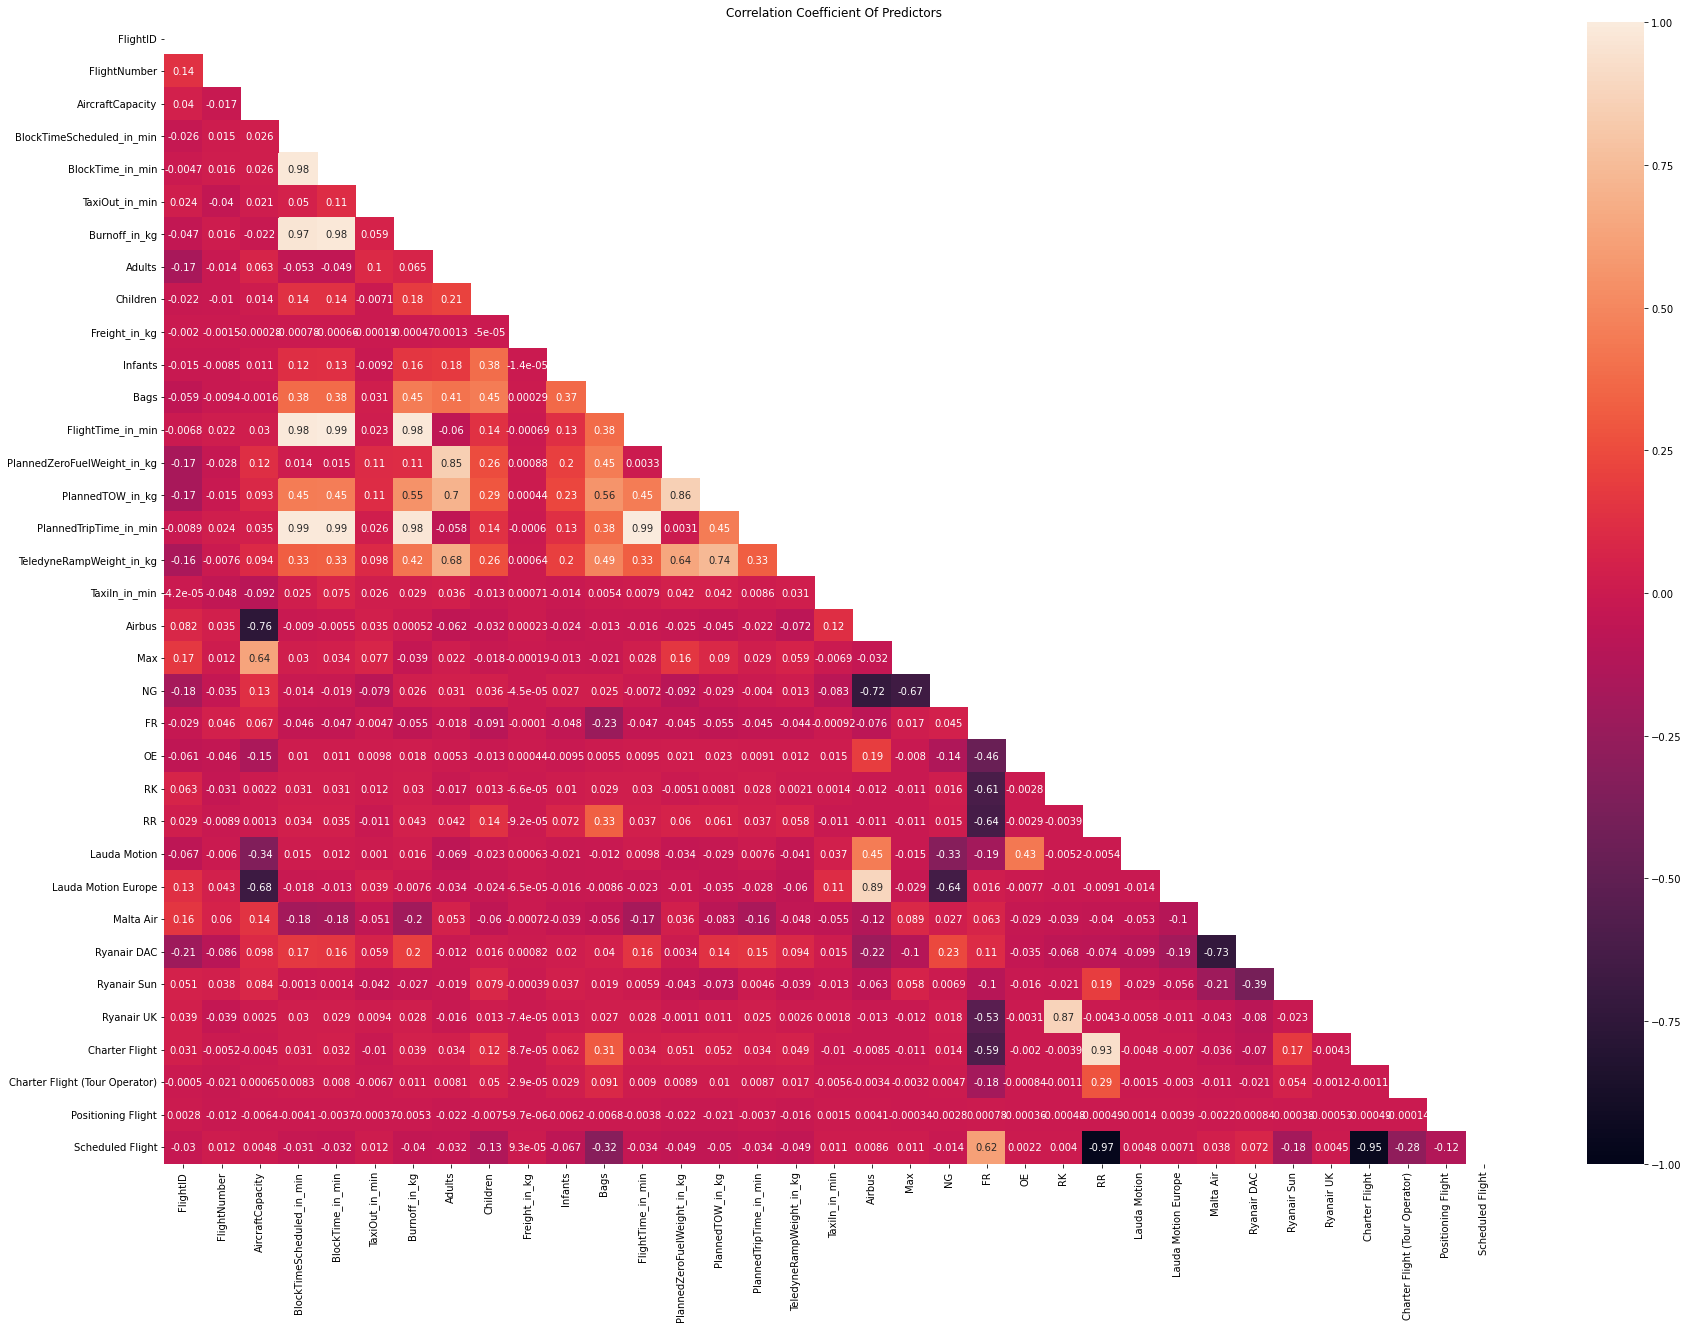

In [ ]:
# set figure size
plt.figure(figsize=(30,21))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(new_df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(new_df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

We know that either Actual or Schedule variables have to go, so we are not going to perform VIF between these.

Burnoff_in_kg/h - Blocktime_in_min

Flighttime_in_min - Blocktime_in_min

Flighttime_in_min - Burnoff_in_kg/h

Planned_trip_time - Blocktime_in_min

Planned_trip_time - Burnoff_in_kg/h

Planned_trip_time - Flighttime_in_min

Scheduled Flight - RR

In [ ]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = new_df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# features to consider removing
considered_features = ['Burnoff_in_kg', 'BlockTime_in_min', 'FlightTime_in_min', 'PlannedTripTime_in_min']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
2,FlightTime_in_min,166.690534
1,BlockTime_in_min,88.647408
3,PlannedTripTime_in_min,82.902215
0,Burnoff_in_kg,26.247323


In [ ]:
# compute vif values after removing a feature
considered_features.remove('FlightTime_in_min')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,Burnoff_in_kg,25.525883
1,BlockTime_in_min,51.792021
2,PlannedTripTime_in_min,46.865474


In [ ]:
# compute vif values after removing a feature
considered_features.remove('BlockTime_in_min')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,Burnoff_in_kg,21.151589
1,PlannedTripTime_in_min,21.151589


In [ ]:
# What to do here? After checking the VIF all these variables give us a very high VIF.

**OUTLIERS**



Block time 
Taxi out 
burnoff


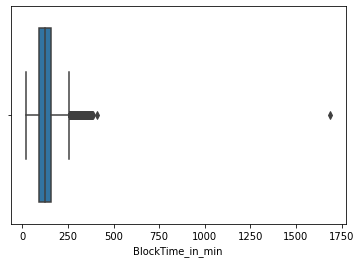

In [ ]:
# Boxplot for 'BlockTime' to check outliers.
sns.boxplot(x=df["BlockTime_in_min"])

In [ ]:
Q1 = df['BlockTime_in_min'].quantile(0.25)
Q3 = df['BlockTime_in_min'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol1 = df[df['BlockTime_in_min'] < (Q1-1.5 * IQR)].shape[0] + df[df['BlockTime_in_min'] > (Q3 + 1.5 * IQR)].shape[0]
ol1

14893

In [ ]:
df[df['BlockTime_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
59,181185726,1811,9HVUU,197,Max,Scheduled Flight,FR,Malta Air,MXP-TFS,MXP-TFS,...,7,0.0,2,43,259.0,61068.0,72515.0,16017.0,70600.0,4.0
77,180717293,653,EIENV,189,NG,Scheduled Flight,FR,Ryanair DAC,PIK-TFS,PIK-TFS,...,15,0.0,0,101,272.0,59510.0,73666.0,16326.0,73013.0,3.0
195,180817445,4410,EIEVE,189,NG,Scheduled Flight,FR,Ryanair DAC,RHO-DUB,RHO-DUB,...,5,0.0,1,77,279.0,58593.0,73567.0,17202.0,72414.0,9.0
210,178812468,851,EIEMO,189,NG,Scheduled Flight,FR,Ryanair DAC,LPL-FUE,LPL-FUE,...,29,0.0,0,81,247.0,58375.0,72118.0,15193.0,72179.0,3.0
220,180946383,9077,EIEKP,189,NG,Scheduled Flight,FR,Ryanair DAC,RHO-MAN,RHO-MAN,...,5,0.0,4,109,249.0,57497.0,70887.0,15158.0,70383.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765080,178772330,12,EIGXK,189,NG,Scheduled Flight,FR,Ryanair DAC,ATH-STN,ATH-STN,...,2,686.0,2,51,255.0,58314.0,71138.0,14782.0,72052.0,6.0
765082,180877309,6698,EIENO,189,NG,Scheduled Flight,FR,Ryanair DAC,EDI-LPA,EDI-LPA,...,15,0.0,1,62,302.0,57459.0,72256.0,17287.0,71435.0,3.0
765102,179911546,2822,EIENR,189,NG,Scheduled Flight,FR,Ryanair DAC,CHQ-MAN,CHQ-MAN,...,18,0.0,1,87,251.0,58631.0,72426.0,15415.0,71054.0,4.0
765109,179041612,8339,EIEGA,189,NG,Scheduled Flight,FR,Ryanair DAC,LPA-MAN,LPA-MAN,...,4,0.0,0,18,246.0,47823.0,59543.0,15026.0,59735.0,6.0


In [ ]:
df[df['BlockTime_in_min'] < (Q1 - 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
df = df.drop(df[df['BlockTime_in_min'] > (Q3 + 1.5 * IQR)].index)

In [ ]:
df = df.drop(df[df['BlockTime_in_min'] < (Q1 - 1.5 * IQR)].index)

In [ ]:
df[df['BlockTime_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
df[df['BlockTime_in_min'] < (Q1 - 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


After checking one strange outlier in BlockTime, we are drop every flight that its block time was bigger than 750min.

In [ ]:
#df = df.drop(df[df['BlockTime_in_min'] > 750].index)

In [ ]:
#df[df['BlockTime_in_min'] > 750]

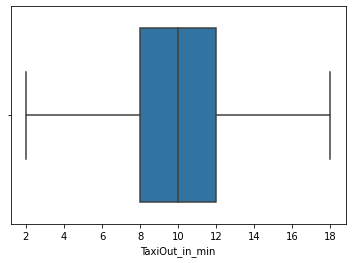

In [ ]:
# Boxplot for 'TaxiOut_in_min' to check outliers.
sns.boxplot(x=df["TaxiOut_in_min"])

In [ ]:
Q1 = df['TaxiOut_in_min'].quantile(0.25)
Q3 = df['TaxiOut_in_min'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol2 = df[df['TaxiOut_in_min'] < (Q1-1.5 * IQR)].shape[0] + df[df['TaxiOut_in_min'] > (Q3 + 1.5 * IQR)].shape[0]
ol2

33065

In [ ]:
# To check if the minimun taxiOut is realistic.
df['TaxiOut_in_min'].min()

1.0

In [ ]:
df[df['TaxiOut_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
7,180091505,6366,EIEBR,189,NG,Scheduled Flight,FR,Ryanair DAC,BGY-BCN,BGY-BCN,...,0,0.0,0,9,73.0,52218.0,58187.0,4863.0,54492.0,5.0
52,178893936,2971,EIEBX,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-KUN,DUB-KUN,...,10,0.0,0,31,154.0,58577.0,67539.0,9376.0,65811.0,4.0
55,181058856,6267,EIDYD,189,NG,Scheduled Flight,FR,Ryanair DAC,BCN-EDI,BCN-EDI,...,5,0.0,0,39,149.0,52138.0,60145.0,9107.0,58320.0,5.0
73,180997857,6827,EIEGA,189,NG,Scheduled Flight,FR,Ryanair DAC,FAO-EDI,FAO-EDI,...,2,0.0,0,36,161.0,50093.0,58322.0,10290.0,58048.0,4.0
83,179938688,3186,EIEBF,189,NG,Scheduled Flight,FR,Ryanair DAC,MAD-MAN,MAD-MAN,...,9,0.0,3,57,123.0,54111.0,61309.0,7806.0,61857.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765043,180928925,8474,EIDWI,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-PIS,STN-PIS,...,4,0.0,1,34,73.0,51747.0,59344.0,4397.0,57812.0,5.0
765052,178967322,5513,EIESN,189,NG,Scheduled Flight,FR,Ryanair DAC,MXP-CTA,MXP-CTA,...,6,0.0,1,19,98.0,58109.0,65012.0,6401.0,64904.0,4.0
765057,181051836,4891,9HQAG,189,NG,Scheduled Flight,FR,Malta Air,FCO-CTA,FCO-CTA,...,6,0.0,1,27,60.0,58124.0,63087.0,3776.0,63090.0,5.0
765147,181398738,8173,EIHET,197,Max,Scheduled Flight,FR,Ryanair DAC,AGA-CRL,AGA-CRL,...,3,0.0,1,74,188.0,61713.0,70166.0,11519.0,68460.0,6.0


In [ ]:
df[df['TaxiOut_in_min'] < (Q1 - 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
3370,180731518,1236,EIENS,189,NG,Scheduled Flight,FR,Ryanair DAC,ATH-JTR,ATH-JTR,...,1,0.0,1,71,40.0,59725.0,63848.0,2108.0,65104.0,5.0
6110,179059558,8886,EIENH,189,NG,Scheduled Flight,FR,Ryanair DAC,BDS-BGY,BDS-BGY,...,16,0.0,0,55,86.0,58202.0,65193.0,5287.0,64397.0,4.0
25173,181270801,4339,9HQDQ,189,NG,Scheduled Flight,FR,Malta Air,BDS-BLQ,BDS-BLQ,...,4,0.0,1,17,68.0,58003.0,63521.0,4306.0,61802.0,4.0
27396,179904971,2714,EIDPN,189,NG,Scheduled Flight,FR,Ryanair DAC,ALC-LGW,ALC-LGW,...,1,0.0,0,17,124.0,53011.0,60674.0,7905.0,54909.0,6.0
36313,181185527,1808,EIDLK,189,NG,Scheduled Flight,FR,Ryanair DAC,EIN-EDI,EIN-EDI,...,1,0.0,1,24,90.0,56145.0,62356.0,5284.0,60242.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732337,178935780,4441,EIENS,189,NG,Scheduled Flight,FR,Ryanair DAC,VLC-BRS,VLC-BRS,...,21,0.0,2,63,136.0,58484.0,66738.0,7650.0,67154.0,4.0
736540,178829327,1389,9HQAC,189,NG,Scheduled Flight,FR,Malta Air,BOD-CRL,BOD-CRL,...,1,0.0,1,22,73.0,54984.0,59745.0,4423.0,58809.0,4.0
742221,178818285,1073,EIFID,189,NG,Scheduled Flight,FR,Ryanair DAC,EDI-WRO,EDI-WRO,...,21,0.0,5,52,122.0,57755.0,69866.0,7702.0,69367.0,1.0
743071,178861781,2121,EIEGC,189,NG,Scheduled Flight,FR,Ryanair DAC,CRL-PRG,CRL-PRG,...,1,0.0,0,12,74.0,52498.0,58236.0,4468.0,58592.0,7.0


In [ ]:
df = df.drop(df[df['TaxiOut_in_min'] > (Q3 + 1.5 * IQR)].index)

In [ ]:
df = df.drop(df[df['TaxiOut_in_min'] < (Q1 - 1.5 * IQR)].index)

In [ ]:
df[df['TaxiOut_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
df[df['TaxiOut_in_min'] < (Q1 - 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
#df[df['TaxiOut_in_min'] > 60]

Although these times are feasable, we have decided that as they are not representatives, we should remove them.

In [ ]:
#df = df.drop(df[df['TaxiOut_in_min'] > 60].index)

In [ ]:
#df[df['TaxiOut_in_min'] > 60]

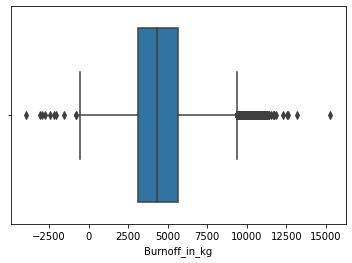

In [ ]:
# Boxplot for 'Burnoff_in_kg' to check outliers.
sns.boxplot(x=df["Burnoff_in_kg"])

In [ ]:
Q1 = df['Burnoff_in_kg'].quantile(0.25)
Q3 = df['Burnoff_in_kg'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol3 = df[df['Burnoff_in_kg'] < (Q1-1.5 * IQR)].shape[0] + df[df['Burnoff_in_kg'] > (Q3 + 1.5 * IQR)].shape[0]
ol3

7103

As there are so many outliers, we have decided to calculate the minimun BlockTime to then get the minimun possible Burnoff of a trip. 

In the presentation delivered to us by Ryanair, the average consumption of a B737 and an Airbus A380 is 2400-2500 kg/h.

In [ ]:
df['BlockTime_in_min'].min()

20.0

As 20 min is the minimun time of BlockTime, the minimun Burnoff must be greater than (2400/60min)*40min = 1600. 

In [ ]:
df[df['Burnoff_in_kg'] < 1300]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
2138,179771438,442,EIDWI,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-LPL,DUB-LPL,...,1,0.0,0,12,29.0,48358.0,51593.0,1767.0,49848.0,6.0
2154,181114138,4539,EIDWM,189,NG,Scheduled Flight,FR,Ryanair DAC,AGP-TTU,AGP-TTU,...,14,0.0,1,47,23.0,56732.0,61423.0,1504.0,61458.0,3.0
2588,180531873,6578,EIDPV,189,NG,Scheduled Flight,FR,Ryanair DAC,BCN-PMI,BCN-PMI,...,0,0.0,2,15,23.0,51449.0,54845.0,1700.0,53621.0,4.0
2640,179003317,6853,EIFTV,189,NG,Scheduled Flight,FR,Ryanair DAC,TNG-SVQ,TNG-SVQ,...,0,0.0,1,14,27.0,52849.0,56861.0,2058.0,56234.0,5.0
2771,181230890,3071,EIEPC,189,NG,Scheduled Flight,FR,Ryanair DAC,PMI-BCN,PMI-BCN,...,6,0.0,2,13,28.0,58371.0,63494.0,2309.0,60406.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762035,179015650,7216,EIFTV,189,NG,Scheduled Flight,FR,Ryanair DAC,VLC-IBZ,VLC-IBZ,...,4,0.0,1,21,30.0,52315.0,58210.0,1881.0,58646.0,6.0
762579,180907416,7566,EIEKW,189,NG,Scheduled Flight,FR,Ryanair DAC,ALC-IBZ,ALC-IBZ,...,4,0.0,0,21,22.0,54728.0,60551.0,1614.0,59680.0,5.0
762701,181212246,2537,9HQDB,189,NG,Scheduled Flight,FR,Malta Air,MLA-CTA,MLA-CTA,...,3,0.0,1,25,28.0,57690.0,61654.0,1993.0,60188.0,4.0
765125,180546550,7216,EIDYE,189,NG,Scheduled Flight,FR,Ryanair DAC,VLC-IBZ,VLC-IBZ,...,0,0.0,0,21,22.0,54993.0,60506.0,1548.0,56197.0,4.0


Although some of these values might be real (the majority, as the negatives ones, are wrong), we have decided to remove them as they are not representatives.

In [ ]:
df = df.drop(df[df['Burnoff_in_kg'] < 1300].index)

We decided to remove the rows below 1300 kg because there are no flights shorter than 40 min so some of those comsuptions are impossible.

In [ ]:
df[df['Burnoff_in_kg'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
49,178917726,3921,EIEKR,189,NG,Scheduled Flight,FR,Ryanair DAC,BGY-TBS,BGY-TBS,...,5,0.0,0,52,226.0,59232.0,72532.0,13379.0,73249.0,6.0
303,180890229,7124,EIGXM,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-ACE,DUB-ACE,...,8,0.0,0,106,227.0,58443.0,70421.0,13960.0,70600.0,3.0
319,180974211,7642,EIEBX,189,NG,Scheduled Flight,FR,Ryanair DAC,MAN-JTR,MAN-JTR,...,0,0.0,0,70,224.0,54407.0,74238.0,13429.0,73684.0,4.0
393,180692920,8179,EIDLX,189,NG,Scheduled Flight,FR,Ryanair DAC,TFS-CRL,TFS-CRL,...,13,0.0,4,60,243.0,54040.0,66411.0,15142.0,65158.0,6.0
444,180734609,1347,EIEFN,189,NG,Scheduled Flight,FR,Ryanair DAC,TFS-SNN,TFS-SNN,...,19,0.0,0,67,235.0,53535.0,65434.0,14055.0,64886.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764850,179006535,6927,EIEKI,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-ESU,STN-ESU,...,4,0.0,1,23,218.0,54975.0,73649.0,12567.0,71689.0,5.0
764898,181045613,3742,EIEMD,189,NG,Scheduled Flight,FR,Ryanair DAC,FUE-BHX,FUE-BHX,...,38,0.0,3,115,230.0,58743.0,71105.0,14462.0,70129.0,5.0
764992,178944636,4755,EIEKR,189,NG,Scheduled Flight,FR,Ryanair DAC,BRS-ACE,BRS-ACE,...,7,0.0,2,100,223.0,59347.0,71910.0,13540.0,72233.0,2.0
765055,181368786,7128,EIEVI,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-FUE,DUB-FUE,...,12,0.0,2,63,237.0,58256.0,70735.0,14766.0,70437.0,6.0


In [ ]:
df = df.drop(df[df['Burnoff_in_kg'] > (Q3 + 1.5 * IQR)].index)

In [ ]:
#df[df['Burnoff_in_kg'] < 800]

We have checked outliers for the variable Burnoff and we are not sure what this variable represents yet so we decided just to eliminate the values below 0 which are impossible.

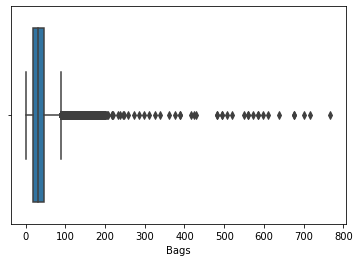

In [ ]:
# Boxplot for 'Bags' to check outliers.
sns.boxplot(x=df["Bags"])

In [ ]:
Q1 = df['Bags'].quantile(0.25)
Q3 = df['Bags'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol4 = df[df['Bags'] < (Q1-1.5 * IQR)].shape[0] + df[df['Bags'] > (Q3 + 1.5 * IQR)].shape[0]
ol4

19900

In [ ]:
df[df['Bags'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
28,181265222,4170,EIDWT,189,NG,Scheduled Flight,FR,Ryanair DAC,FAO-FRA,FAO-FRA,...,2,0.0,2,91,155.0,57846.0,67199.0,10034.0,65467.0,12.0
29,180849256,5443,EIEFO,189,NG,Scheduled Flight,FR,Ryanair DAC,NAP-RAK,NAP-RAK,...,34,0.0,2,125,195.0,57957.0,69698.0,11993.0,68442.0,7.0
30,178948892,4896,9HQEF,189,NG,Scheduled Flight,FR,Malta Air,ACE-BLQ,ACE-BLQ,...,7,0.0,2,94,231.0,58910.0,71114.0,14327.0,71036.0,4.0
168,180983202,3501,SPRKD,189,NG,Charter Flight,RR,Ryanair Sun,KTW-RHO,KTW-RHO,...,43,0.0,2,172,141.0,60309.0,68998.0,8713.0,67680.0,4.0
293,180983003,3204,SPRKM,189,NG,Charter Flight,RR,Ryanair Sun,ZTH-KTW,ZTH-KTW,...,53,0.0,2,150,116.0,60314.0,68205.0,7440.0,65920.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765053,178813073,904,EIFIH,189,NG,Scheduled Flight,FR,Ryanair DAC,PMO-NUE,PMO-NUE,...,16,0.0,6,98,124.0,58695.0,66434.0,7287.0,66755.0,4.0
765083,181394662,8075,EIEKH,189,NG,Scheduled Flight,FR,Ryanair DAC,CRL-RAK,CRL-RAK,...,13,0.0,1,99,197.0,59347.0,70803.0,12255.0,67970.0,3.0
765153,181122128,4833,9HQCU,189,NG,Scheduled Flight,FR,Malta Air,CAG-NRN,CAG-NRN,...,8,0.0,1,90,139.0,57208.0,65062.0,8490.0,64995.0,6.0
765184,181234924,3155,9HVUE,197,Max,Scheduled Flight,FR,Malta Air,AMM-BGY,AMM-BGY,...,0,0.0,0,95,226.0,60725.0,71162.0,14168.0,71834.0,3.0


In [ ]:
df = df.drop(df[df['Bags'] > (Q3 + 1.5 * IQR)].index)

In [ ]:
df[df['Bags'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
#df[df['Bags'] > 200]

In this case, for the variable bags we decided to filter for more than 200 because it is not representative that there are more than 1 checked-in bag per passenger in the flight.

In [ ]:
#df = df.drop(df[df['Bags'] > 200].index)

In [ ]:
#df[df['Bags'] > 200]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


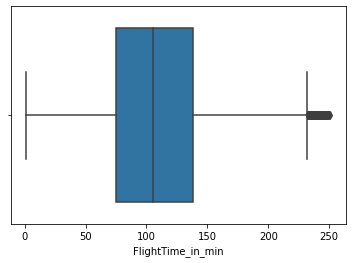

In [ ]:
# Boxplot for 'FlightTime_in_min' to check outliers.
sns.boxplot(x=df["FlightTime_in_min"])

In [ ]:
Q1 = df['FlightTime_in_min'].quantile(0.25)
Q3 = df['FlightTime_in_min'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol5 = df[df['FlightTime_in_min'] < (Q1-1.5 * IQR)].shape[0] + df[df['FlightTime_in_min'] > (Q3 + 1.5 * IQR)].shape[0]
ol5

3539

In [ ]:
df['FlightTime_in_min'].mean()

108.6496408828134

In [ ]:
df['FlightTime_in_min'].max()

251.0

In [ ]:
df[df['FlightTime_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
82,181396300,8132,EIHAY,197,Max,Scheduled Flight,FR,Ryanair DAC,STN-LPA,STN-LPA,...,16,0.0,3,79,238.0,60682.0,71137.0,14487.0,69911.0,2.0
280,180976034,8584,EIEFD,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-RHO,STN-RHO,...,0,0.0,0,6,237.0,43442.0,53860.0,14508.0,54927.0,4.0
369,180220848,8839,9HQBI,189,NG,Scheduled Flight,FR,Malta Air,TFS-BGY,TFS-BGY,...,2,0.0,3,22,237.0,48962.0,60177.0,14927.0,60369.0,3.0
693,179781553,654,EIEKE,189,NG,Scheduled Flight,FR,Ryanair DAC,TFS-PIK,TFS-PIK,...,3,0.0,1,16,240.0,53876.0,66891.0,14907.0,59825.0,2.0
847,180489819,4331,EIEFZ,189,NG,Scheduled Flight,FR,Ryanair DAC,TFS-MAN,TFS-MAN,...,0,0.0,0,52,236.0,58387.0,71988.0,14756.0,63181.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763963,181368787,7128,EIHEW,197,Max,Scheduled Flight,FR,Ryanair DAC,DUB-FUE,DUB-FUE,...,18,0.0,2,80,236.0,61126.0,71460.0,14545.0,71072.0,4.0
764242,180876208,6627,EIEGA,189,NG,Scheduled Flight,FR,Ryanair DAC,ACE-EDI,ACE-EDI,...,14,0.0,1,33,238.0,53320.0,64977.0,14383.0,63544.0,5.0
764671,181248724,3742,EIENN,189,NG,Scheduled Flight,FR,Ryanair DAC,FUE-BHX,FUE-BHX,...,4,0.0,2,32,240.0,53652.0,65050.0,14456.0,64360.0,4.0
765049,179953347,3701,EIEKE,189,NG,Scheduled Flight,FR,Ryanair DAC,EMA-FUE,EMA-FUE,...,6,0.0,0,16,244.0,49878.0,62052.0,15059.0,57993.0,3.0


In [ ]:
df = df.drop(df[df['FlightTime_in_min'] > (Q3 + 1.5 * IQR)].index)

In [ ]:
df[df['FlightTime_in_min'] < 20]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
17880,180833400,4915,9HQCY,189,NG,Scheduled Flight,FR,Malta Air,VRN-PMO,VRN-PMO,...,19,0.0,0,54,1.0,57880.0,64132.0,4856.0,63707.0,72.0
20459,180007106,4707,9HQCV,189,NG,Scheduled Flight,FR,Malta Air,CAG-BGY,CAG-BGY,...,18,0.0,5,87,3.0,58612.0,64183.0,4791.0,62764.0,63.0
40340,179775385,552,EIEBO,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-MAN,DUB-MAN,...,2,0.0,1,12,4.0,47293.0,50723.0,2260.0,50556.0,23.0
98538,179762901,294,EIDYW,189,NG,Scheduled Flight,FR,Ryanair DAC,DUB-STN,DUB-STN,...,9,0.0,1,26,1.0,57495.0,62981.0,3683.0,56977.0,69.0
156707,181104416,2009,9HQBU,189,NG,Scheduled Flight,FR,Malta Air,BLQ-TPS,BLQ-TPS,...,22,0.0,3,41,8.0,56833.0,62764.0,4473.0,62601.0,63.0
211694,180979566,2706,9HQAA,189,NG,Scheduled Flight,FR,Malta Air,PEG-CTA,PEG-CTA,...,11,0.0,1,9,13.0,54059.0,59199.0,4350.0,59190.0,54.0
217708,178923661,4039,SPRSU,189,NG,Scheduled Flight,FR,Ryanair Sun,KRK-MMX,KRK-MMX,...,3,481.0,0,37,12.0,55699.0,60784.0,4424.0,58465.0,66.0
246890,181262971,4111,9HQAT,189,NG,Scheduled Flight,FR,Malta Air,BGY-NAP,BGY-NAP,...,3,0.0,1,6,3.0,58389.0,64128.0,4234.0,62891.0,69.0
253641,181410867,8518,9HQDY,189,NG,Scheduled Flight,FR,Malta Air,CGN-BGY,CGN-BGY,...,4,0.0,1,31,13.0,58278.0,63689.0,4518.0,61712.0,60.0
297864,180093293,6387,EIEPD,189,NG,Scheduled Flight,FR,Ryanair DAC,AGP-BCN,AGP-BCN,...,6,0.0,0,26,3.0,54137.0,60723.0,4656.0,61095.0,66.0


In [ ]:
df = df.drop(df[df['FlightTime_in_min'] < 20].index)

In [ ]:
df['BlockTimeScheduled_in_min'].min() - df['FlightTime_in_min'].min()

5.0

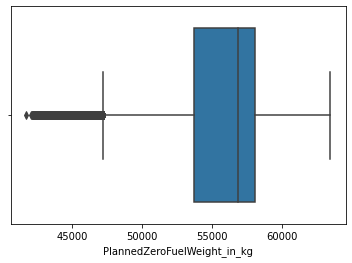

In [ ]:
# Boxplot for 'PlannedZeroFuelWeight_in_kg' to check outliers.
sns.boxplot(x=df["PlannedZeroFuelWeight_in_kg"])

In [ ]:
Q1 = df['PlannedZeroFuelWeight_in_kg'].quantile(0.25)
Q3 = df['PlannedZeroFuelWeight_in_kg'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol6 = df[df['PlannedZeroFuelWeight_in_kg'] < (Q1-1.5 * IQR)].shape[0] + df[df['PlannedZeroFuelWeight_in_kg'] > (Q3 + 1.5 * IQR)].shape[0]
ol6

19184

In [ ]:
df['PlannedZeroFuelWeight_in_kg'].min()

41716.0

All the values of this variable are correct.

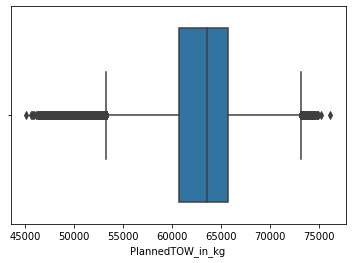

In [ ]:
# Boxplot for 'PlannedTOW_in_kg' to check outliers.
sns.boxplot(x=df["PlannedTOW_in_kg"])

In [ ]:
Q1 = df['PlannedTOW_in_kg'].quantile(0.25)
Q3 = df['PlannedTOW_in_kg'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol7 = df[df['PlannedTOW_in_kg'] < (Q1-1.5 * IQR)].shape[0] + df[df['PlannedTOW_in_kg'] > (Q3 + 1.5 * IQR)].shape[0]
ol7

17076

In [ ]:
df[df['PlannedTOW_in_kg'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
3359,180903411,7423,EIEMM,189,NG,Scheduled Flight,FR,Ryanair DAC,ALC-NYO,ALC-NYO,...,16,0.0,0,49,202.0,53105.0,73346.0,12116.0,72469.0,5.0
6690,181038333,2563,EIEVI,189,NG,Scheduled Flight,FR,Ryanair DAC,AGP-TRF,AGP-TRF,...,5,0.0,0,27,219.0,53671.0,74183.0,13412.0,67244.0,5.0
6891,178911224,3556,EIEMA,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-RAK,STN-RAK,...,0,0.0,1,70,192.0,59675.0,73359.0,11857.0,73394.0,3.0
8155,180554024,7423,EIEKW,189,NG,Scheduled Flight,FR,Ryanair DAC,ALC-NYO,ALC-NYO,...,7,0.0,2,60,208.0,57473.0,73582.0,12562.0,71779.0,4.0
12029,180554001,7423,EIGXG,189,NG,Scheduled Flight,FR,Ryanair DAC,ALC-NYO,ALC-NYO,...,3,0.0,0,75,219.0,58842.0,74050.0,13618.0,70129.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754299,180233097,9076,EIEKW,189,NG,Scheduled Flight,FR,Ryanair DAC,MAN-RHO,MAN-RHO,...,10,0.0,0,60,232.0,53022.0,73740.0,13722.0,66972.0,4.0
756702,181164587,1062,EIGJT,189,NG,Scheduled Flight,FR,Ryanair DAC,MAD-WMI,MAD-WMI,...,1,15.0,0,38,204.0,57437.0,73253.0,12471.0,69530.0,5.0
756900,180208897,8584,EIEFY,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-RHO,STN-RHO,...,2,0.0,2,69,225.0,55801.0,74675.0,13674.0,67879.0,4.0
757228,180818590,4482,EIEFI,189,NG,Scheduled Flight,FR,Ryanair DAC,BCN-RIX,BCN-RIX,...,9,0.0,0,30,197.0,54877.0,73644.0,12352.0,70002.0,4.0


In [ ]:
df = df.drop(df[df['PlannedTOW_in_kg'] > (Q3 + 1.5 * IQR)].index)

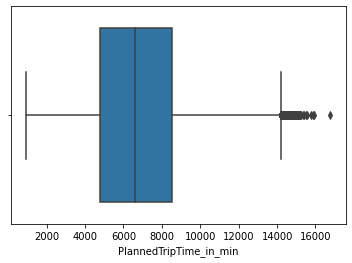

In [ ]:
# Boxplot for 'PlannedTripTime_in_min' to check outliers.
sns.boxplot(x=df["PlannedTripTime_in_min"])

In [ ]:
Q1 = df['PlannedTripTime_in_min'].quantile(0.25)
Q3 = df['PlannedTripTime_in_min'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
ol8 = df[df['PlannedTripTime_in_min'] < (Q1-1.5 * IQR)].shape[0] + df[df['PlannedTripTime_in_min'] > (Q3 + 1.5 * IQR)].shape[0]
ol8

1227

In [ ]:
df['PlannedTripTime_in_min'].min()

918.0

In [ ]:
df[df['PlannedTripTime_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min
714,181244859,3512,EIEFO,189,NG,Scheduled Flight,FR,Ryanair DAC,ACE-LTN,ACE-LTN,...,6,0.0,2,47,214.0,53395.0,64939.0,14350.0,64923.0,6.0
743,181042958,3131,EIEVA,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-PFO,STN-PFO,...,5,0.0,1,69,230.0,54611.0,66508.0,14394.0,64397.0,4.0
1170,181392163,7913,EIEVF,189,NG,Scheduled Flight,FR,Ryanair DAC,FUE-LTN,FUE-LTN,...,2,0.0,0,10,227.0,46089.0,56200.0,14285.0,55562.0,3.0
1487,181221302,2836,SPRSH,189,NG,Scheduled Flight,FR,Ryanair Sun,VNO-TLV,VNO-TLV,...,18,0.0,2,78,223.0,58315.0,72207.0,14637.0,69530.0,9.0
1510,180794776,3516,EIEKP,189,NG,Scheduled Flight,FR,Ryanair DAC,LPA-LTN,LPA-LTN,...,0,0.0,0,9,228.0,44677.0,55134.0,14359.0,55308.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760322,179989231,4331,EIEKF,189,NG,Scheduled Flight,FR,Ryanair DAC,TFS-MAN,TFS-MAN,...,0,0.0,2,29,226.0,55376.0,68263.0,14268.0,60841.0,6.0
763072,180441565,2132,EIEBY,189,NG,Scheduled Flight,FR,Ryanair DAC,ACE-MAN,ACE-MAN,...,3,0.0,1,40,227.0,52748.0,64547.0,14569.0,58410.0,5.0
763823,180618173,8133,EIGSG,189,NG,Scheduled Flight,FR,Ryanair DAC,LPA-STN,LPA-STN,...,4,0.0,0,23,232.0,51304.0,62669.0,14291.0,58701.0,4.0
764779,180682048,8289,EIEME,189,NG,Scheduled Flight,FR,Ryanair DAC,ACE-STN,ACE-STN,...,4,0.0,0,19,228.0,50749.0,62485.0,14204.0,58828.0,5.0


In [ ]:
df = df.drop(df[df['PlannedTripTime_in_min'] > (Q3 + 1.5 * IQR)].index)

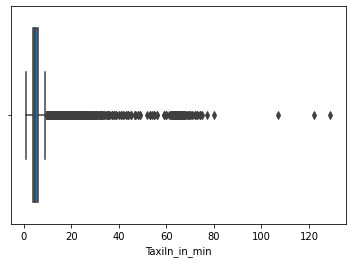

In [ ]:
# Boxplot for 'FlightTime_in_min' to check outliers.
sns.boxplot(x=df["TaxiIn_in_min"])

In [ ]:
df[df['TaxiIn_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
df = df.drop(df[df['TaxiIn_in_min'] > (Q3 + 1.5 * IQR)].index)

In [ ]:
df[df['TaxiIn_in_min'] > (Q3 + 1.5 * IQR)]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Children,Freight_in_kg,Infants,Bags,FlightTime_in_min,PlannedZeroFuelWeight_in_kg,PlannedTOW_in_kg,PlannedTripTime_in_min,TeledyneRampWeight_in_kg,TaxiIn_in_min


In [ ]:
#df[df['TaxiIn_in_min'] > 60]

Although these times are feasable, we have decided that as they are not representatives, we should remove them.

In [ ]:
#df = df.drop(df[df['TaxiIn_in_min'] > 60].index)

In [ ]:
#df[df['TaxiIn_in_min'] > 60]

In [ ]:
df.shape

(682757, 29)

In [ ]:
OHE_AircraftTypeGroup = pd.get_dummies(df.AircraftTypeGroup)
OHE_Carrier = pd.get_dummies(df.Carrier)
OHE_AOCDescription = pd.get_dummies(df.AOCDescription)
OHE_ServiceDescription = pd.get_dummies(df.ServiceDescription)

In [ ]:
new_df = pd.concat([df, OHE_AircraftTypeGroup, OHE_Carrier, OHE_AOCDescription, OHE_ServiceDescription], axis=1)
new_df

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Lauda Motion,Lauda Motion Europe,Malta Air,Ryanair DAC,Ryanair Sun,Ryanair UK,Charter Flight,Charter Flight (Tour Operator),Positioning Flight,Scheduled Flight
0,181142302,221,SPRZK,197,Max,Scheduled Flight,FR,Ryanair Sun,EMA-BUD,EMA-BUD,...,0,0,0,0,1,0,0,0,0,1
1,178908306,3373,9HQEC,189,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,TRN-MLA,...,0,0,1,0,0,0,0,0,0,1
2,178886981,2814,9HQCN,189,NG,Scheduled Flight,FR,Malta Air,STN-CGN,STN-CGN,...,0,0,1,0,0,0,0,0,0,1
3,180538798,6893,SPRKP,189,NG,Scheduled Flight,FR,Ryanair Sun,DTM-KTW,DTM-KTW,...,0,0,0,0,1,0,0,0,0,1
4,178863684,2156,EIDWJ,189,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,BHX-AGP,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765231,180266656,9852,EIENM,189,NG,Scheduled Flight,FR,Ryanair DAC,ORK-LGW,ORK-LGW,...,0,0,0,1,0,0,0,0,0,1
765232,180731656,1237,EIENM,189,NG,Scheduled Flight,FR,Ryanair DAC,JTR-ATH,JTR-ATH,...,0,0,0,1,0,0,0,0,0,1
765233,181168643,1183,EIEBM,189,NG,Scheduled Flight,FR,Ryanair DAC,LGW-SNN,LGW-SNN,...,0,0,0,1,0,0,0,0,0,1
765234,181143874,297,EIEVI,189,NG,Scheduled Flight,FR,Ryanair DAC,STN-DUB,STN-DUB,...,0,0,0,1,0,0,0,0,0,1


Now we are going to check what variables are good to remove with a simple linear model.

In [ ]:
new_df.dtypes

FlightID                                   int64
FlightNumber                               int64
AircraftRegistration                      object
AircraftCapacity                           int64
AircraftTypeGroup                         object
ServiceDescription                        object
Carrier                                   object
AOCDescription                            object
ScheduledRoute                            object
ActualRoute                               object
DepartureScheduled                datetime64[ns]
ArrivalScheduled                  datetime64[ns]
DepartureActual                   datetime64[ns]
ArrivalActual                     datetime64[ns]
BlockTimeScheduled_in_min                float64
BlockTime_in_min                         float64
TaxiOut_in_min                           float64
Burnoff_in_kg                            float64
Adults                                     int64
Children                                   int64
Freight_in_kg       

In [ ]:
# AircraftRegistration to integer
temp = {i: j for j, i in enumerate(set(new_df['AircraftRegistration']))}
res = [temp[i] for i in new_df['AircraftRegistration']]
AircraftRegistration_int = np.array(res)

new_df['AircraftRegistration_int'] = AircraftRegistration_int

In [ ]:
# ScheduledRoute to integer
temp = {i: j for j, i in enumerate(set(new_df['ScheduledRoute']))}
res = [temp[i] for i in new_df['ScheduledRoute']]
ScheduledRoute_int = np.array(res)

new_df['ScheduledRoute_int'] = ScheduledRoute_int

In [ ]:
# ActualRoute to integer
temp = {i: j for j, i in enumerate(set(new_df['ActualRoute']))}
res = [temp[i] for i in new_df['ActualRoute']]
ActualRoute_int = np.array(res)

new_df['ActualRoute_int'] = ActualRoute_int

In [ ]:
new_df.dtypes

FlightID                                   int64
FlightNumber                               int64
AircraftRegistration                      object
AircraftCapacity                           int64
AircraftTypeGroup                         object
ServiceDescription                        object
Carrier                                   object
AOCDescription                            object
ScheduledRoute                            object
ActualRoute                               object
DepartureScheduled                datetime64[ns]
ArrivalScheduled                  datetime64[ns]
DepartureActual                   datetime64[ns]
ArrivalActual                     datetime64[ns]
BlockTimeScheduled_in_min                float64
BlockTime_in_min                         float64
TaxiOut_in_min                           float64
Burnoff_in_kg                            float64
Adults                                     int64
Children                                   int64
Freight_in_kg       

In [ ]:
import datetime as dt
new_df['DepartureScheduled'] = pd.to_datetime(new_df['DepartureScheduled'])
new_df['DepartureScheduled']=new_df['DepartureScheduled'].map(dt.datetime.toordinal)

new_df['ArrivalScheduled'] = pd.to_datetime(new_df['ArrivalScheduled'])
new_df['ArrivalScheduled']=new_df['ArrivalScheduled'].map(dt.datetime.toordinal)

new_df['DepartureActual'] = pd.to_datetime(new_df['DepartureActual'])
new_df['DepartureActual']=new_df['DepartureActual'].map(dt.datetime.toordinal)

new_df['ArrivalActual'] = pd.to_datetime(new_df['ArrivalActual'])
new_df['ArrivalActual']=new_df['ArrivalActual'].map(dt.datetime.toordinal)

In [ ]:
new_df.shape

(682757, 49)

In [ ]:
from google.colab import files
new_df.to_csv('new_df2.csv', encoding = 'utf-8-sig', index = False) 
files.download('new_df2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_df = pd.read_csv("/content/gdrive/My Drive/Sustainability Datathon/test.csv")
test_df.head()

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,ArrivalScheduled,BlockTimeScheduled,Adults,Children,Freight,Infants,Bags
0,181257208,4016,9HQAF,189.0,NG,Scheduled Flight,FR,Malta Air,PSR-BGY,2021-11-25 08:00:00,2021-11-25 09:10:00,70.0,175.0,4.0,0.0,0.0,11.0
1,181195213,2037,EIDPZ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,PMI-DTM,2022-03-18 06:00:00,2022-03-18 08:35:00,155.0,140.0,4.0,0.0,1.0,48.0
2,181128045,5084,EIEBR,189.0,NG,Scheduled Flight,FR,Ryanair DAC,PFO-CHQ,2021-10-29 04:05:00,2021-10-29 05:35:00,90.0,49.0,4.0,0.0,0.0,12.0
3,178889497,2872,EIEMR,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BGY-VNO,2020-01-10 07:55:00,2020-01-10 10:25:00,150.0,134.0,11.0,0.0,0.0,48.0
4,178957284,5178,EIDCP,189.0,NG,Scheduled Flight,FR,Ryanair DAC,STN-BLL,2019-11-22 19:30:00,2019-11-22 21:05:00,95.0,172.0,9.0,0.0,3.0,50.0


In [ ]:
temp = {i: j for j, i in enumerate(set(test_df['AircraftRegistration']))}
res = [temp[i] for i in test_df['AircraftRegistration']]
AircraftRegistration_int = np.array(res)

test_df['AircraftRegistration_int'] = AircraftRegistration_int

In [ ]:
# ScheduledRoute to integer
temp = {i: j for j, i in enumerate(set(test_df['ScheduledRoute']))}
res = [temp[i] for i in test_df['ScheduledRoute']]
ScheduledRoute_int = np.array(res)

test_df['ScheduledRoute_int'] = ScheduledRoute_int

In [ ]:
OHE_AircraftTypeGroup = pd.get_dummies(test_df.AircraftTypeGroup)
OHE_Carrier = pd.get_dummies(test_df.Carrier)
OHE_AOCDescription = pd.get_dummies(test_df.AOCDescription)
OHE_ServiceDescription = pd.get_dummies(test_df.ServiceDescription)

In [ ]:
test_df['DepartureScheduled'] = pd.to_datetime(test_df.DepartureScheduled)
test_df['ArrivalScheduled'] = pd.to_datetime(test_df.ArrivalScheduled)

In [ ]:
test_df['DepartureScheduled'] = pd.to_datetime(test_df['DepartureScheduled'])
test_df['DepartureScheduled']=test_df['DepartureScheduled'].map(dt.datetime.toordinal)

test_df['ArrivalScheduled'] = pd.to_datetime(test_df['ArrivalScheduled'])
test_df['ArrivalScheduled']=test_df['ArrivalScheduled'].map(dt.datetime.toordinal)

In [ ]:
test_df = pd.concat([test_df, OHE_AircraftTypeGroup, OHE_Carrier, OHE_AOCDescription, OHE_ServiceDescription], axis=1)
test_df

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,DepartureScheduled,...,Lauda Motion,Lauda Motion Europe,Malta Air,Ryanair DAC,Ryanair Sun,Ryanair UK,Charter Flight,Charter Flight (Tour Operator),Positioning Flight,Scheduled Flight
0,181257208,4016,9HQAF,189.0,NG,Scheduled Flight,FR,Malta Air,PSR-BGY,738119,...,0,0,1,0,0,0,0,0,0,1
1,181195213,2037,EIDPZ,189.0,NG,Scheduled Flight,FR,Ryanair DAC,PMI-DTM,738232,...,0,0,0,1,0,0,0,0,0,1
2,181128045,5084,EIEBR,189.0,NG,Scheduled Flight,FR,Ryanair DAC,PFO-CHQ,738092,...,0,0,0,1,0,0,0,0,0,1
3,178889497,2872,EIEMR,189.0,NG,Scheduled Flight,FR,Ryanair DAC,BGY-VNO,737434,...,0,0,0,1,0,0,0,0,0,1
4,178957284,5178,EIDCP,189.0,NG,Scheduled Flight,FR,Ryanair DAC,STN-BLL,737385,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191304,181214172,2608,EIDPV,189.0,NG,Scheduled Flight,FR,Ryanair DAC,AGP-GLA,738110,...,0,0,0,1,0,0,0,0,0,1
191305,180785362,3018,9HQCM,189.0,NG,Scheduled Flight,FR,Malta Air,CGN-CIA,737959,...,0,0,1,0,0,0,0,0,0,1
191306,181289534,4777,EIENV,189.0,NG,Scheduled Flight,FR,Ryanair DAC,SNN-MAN,738205,...,0,0,0,1,0,0,0,0,0,1
191307,178999084,6772,9HQEF,189.0,NG,Scheduled Flight,FR,Malta Air,MRS-NTE,737432,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
test_df = test_df.rename(columns = {'BlockTimeScheduled' : 'BlockTimeScheduled_in_min'})
test_df = test_df.rename(columns = {'Burnoff' : 'Burnoff_in_kg'})
test_df = test_df.rename(columns = {'Freight' : 'Freight_in_kg'})
test_df = test_df.rename(columns = {'FlightTime' : 'FlightTime_in_min'})
test_df = test_df.rename(columns = {'PlannedZeroFuelWeight' : 'PlannedZeroFuelWeight_in_kg'})
test_df = test_df.rename(columns = {'PlannedTOW' : 'PlannedTOW_in_kg'})
test_df = test_df.rename(columns = {'PlannedTripTime' : 'PlannedTripTime_in_min'})
test_df = test_df.rename(columns = {'TeledyneRampWeight' : 'TeledyneRampWeight_in_kg'})

In [ ]:
test_df.columns

Index(['FlightID', 'FlightNumber', 'AircraftRegistration', 'AircraftCapacity',
       'AircraftTypeGroup', 'ServiceDescription', 'Carrier', 'AOCDescription',
       'ScheduledRoute', 'DepartureScheduled', 'ArrivalScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Freight_in_kg',
       'Infants', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled', 'ArrivalScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Freight_in_kg',
       'Infants', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 247394.31752218914
Coefficients: 
 [-9.39490787e-05  9.81827931e-03  8.17523085e+01  8.20075918e+01
 -8.22787967e+01  3.60372589e+01  8.55794554e+01  4.06091032e+01
 -1.58710457e-05  5.69892724e+00  1.63150142e+01  1.28299465e-01
 -1.00536334e-03 -4.67534906e+01  5.30591707e+02 -4.83838217e+02
 -1.48166393e+02  2.77441713e+02  1.93389048e+02 -3.22664367e+02
  3.43216373e+02 -3.89969864e+02 -1.52458701e+01  3.56730187e+02
 -3.94092095e+02  9.93612690e+01  7.58275752e+01 -3.49886010e+02
  6.35088459e+01  2.10549589e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.596
Model:                                  OLS   Adj. R-squared:                  0.596
Method:                       Least Squares   F-statistic:                 2.815e+04
Date:                      Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                              17:53:51   Log-Likelihood:            -4.5738e+06
No. Observations:                    477929   AIC:                         9.148e+06
Df Residuals:                        477903   BIC:                         9.148e+06
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
pred = model.predict(X_test)
print(mean_absolute_error(y_test, pred))

1137.6265939643815


As we have seen that p of freight id more than 0.9, we will remove it.

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled', 'ArrivalScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children',
       'Infants', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 262629.0082296573
Coefficients: 
 [-9.67144737e-05  8.60724073e-03  8.19801324e+01  3.58446210e+01
 -3.61349995e+01  3.59645715e+01  8.54813432e+01  4.07444529e+01
  7.84932480e-01  1.64015447e+01  1.31077113e-01 -3.23178108e-03
 -5.27881255e+01  5.33966931e+02 -4.81178806e+02 -2.10906091e+02
  3.24569033e+02  1.05398939e+02 -2.19061881e+02  3.20547745e+02
 -3.73335871e+02 -1.62606494e+01  3.51773633e+02 -3.92644765e+02
  1.09919908e+02 -6.35393911e+02  1.23746409e+03 -2.78136420e+02
 -3.23933764e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.594
Model:                                  OLS   Adj. R-squared:                  0.594
Method:                       Least Squares   F-statistic:                 4.156e+04
Date:                      Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                              17:59:28   Log-Likelihood:            -6.5365e+06
No. Observations:                    682757   AIC:                         1.307e+07
Df Residuals:                        682732   BIC:                         1.307e+07
Df Model:                                24                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

We also remove Departure Schedule

In [ ]:
# ENVIAR ESTE
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'ArrivalScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children',
       'Infants', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

X_test = test_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'ArrivalScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children',
       'Infants', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]


from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 262307.90589198493
Coefficients: 
 [-9.66319168e-05  9.52105040e-03  8.11569461e+01 -2.90050522e-01
  3.71276865e+01  8.55244866e+01  4.00667299e+01 -3.33368628e+00
  1.73326741e+01  6.53536991e-02  2.00417233e-03 -4.42467296e+01
  4.92955092e+02 -4.48708362e+02 -1.85504260e+02  4.28064611e+02
  1.55823646e+02 -3.98383998e+02  3.47327108e+02 -3.91573837e+02
 -9.51866666e+00  3.44607090e+02 -3.92714109e+02  1.01872415e+02
 -5.85758087e+02  3.05728770e+02  5.89100778e+02 -3.09071461e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.611
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                 5.205e+04
Date:                      Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:56:00   Log-Likelihood:            -7.3207e+06
No. Observations:                    763413   AIC:                         1.464e+07
Df Residuals:                        763389   BIC:                         1.464e+07
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
pred_df1 = pd.DataFrame()
pred_df1['FlightID'] = test_df['FlightID']
pred_df1['TeledyneRampWeight'] = y_pred
pred_df1

,FlightID,TeledyneRampWeight
0,181257208,63070.470991
1,181195213,64176.883591
2,181128045,53436.544184
3,178889497,64237.641378
4,178957284,65390.024555
...,...,...
191304,181214172,69600.678301
191305,180785362,64973.164777
191306,181289534,56583.062583
191307,178999084,59849.872112


In [ ]:
from google.colab import files
pred_df1.to_csv('pred1_df.csv', encoding = 'utf-8-sig', index = False) 
files.download('pred1_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Instead of removing Departure Schedule, we remove Arrival Schedule

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children',
       'Infants', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

X_test = test_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children',
       'Infants', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]


from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 262294.58126454393
Coefficients: 
 [-9.66378502e-05  9.52124792e-03  8.11568500e+01 -2.90030995e-01
  3.71276774e+01  8.55244764e+01  4.00667282e+01 -3.33365312e+00
  1.73326813e+01  6.53536698e-02  2.00418216e-03 -4.42472928e+01
  4.92955477e+02 -4.48708184e+02 -1.85511057e+02  4.28058480e+02
  1.55815715e+02 -3.98363138e+02  3.47326908e+02 -3.91574201e+02
 -9.51852965e+00  3.44607036e+02 -3.92713953e+02  1.01872739e+02
 -5.85774130e+02  3.05717189e+02  5.89116068e+02 -3.09059126e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.611
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                 5.205e+04
Date:                      Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:56:06   Log-Likelihood:            -7.3207e+06
No. Observations:                    763413   AIC:                         1.464e+07
Df Residuals:                        763389   BIC:                         1.464e+07
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
# Count how many 0 are in infants
new_df[new_df['Infants']==0]

,FlightID,FlightNumber,AircraftRegistration,AircraftCapacity,AircraftTypeGroup,ServiceDescription,Carrier,AOCDescription,ScheduledRoute,ActualRoute,...,Ryanair DAC,Ryanair Sun,Ryanair UK,Charter Flight,Charter Flight (Tour Operator),Positioning Flight,Scheduled Flight,AircraftRegistration_int,ScheduledRoute_int,ActualRoute_int
1,178908306,3373,9HQEC,189,NG,Scheduled Flight,FR,Malta Air,TRN-MLA,TRN-MLA,...,0,0,0,0,0,0,1,234,837,850
2,178886981,2814,9HQCN,189,NG,Scheduled Flight,FR,Malta Air,STN-CGN,STN-CGN,...,0,0,0,0,0,0,1,116,729,740
4,178863684,2156,EIDWJ,189,NG,Scheduled Flight,FR,Ryanair DAC,BHX-AGP,BHX-AGP,...,1,0,0,0,0,0,1,505,5379,5446
7,180091505,6366,EIEBR,189,NG,Scheduled Flight,FR,Ryanair DAC,BGY-BCN,BGY-BCN,...,1,0,0,0,0,0,1,330,4372,4427
9,181192434,1989,EIDYL,189,NG,Scheduled Flight,FR,Ryanair DAC,OPO-TLS,OPO-TLS,...,1,0,0,0,0,0,1,242,1631,1654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765220,179034558,8173,EIEBZ,189,NG,Scheduled Flight,FR,Ryanair DAC,AGA-CRL,AGA-CRL,...,1,0,0,0,0,0,1,497,2264,2294
765225,181356426,6825,EIDYR,189,NG,Scheduled Flight,FR,Ryanair DAC,MXP-MAN,MXP-MAN,...,1,0,0,0,0,0,1,544,2118,2148
765226,180580030,8804,9HQCG,189,NG,Scheduled Flight,FR,Malta Air,CGN-AGP,CGN-AGP,...,0,0,0,0,0,0,1,324,3344,3391
765228,178918342,3947,EIFRC,189,NG,Scheduled Flight,FR,Ryanair DAC,PMO-FCO,PMO-FCO,...,1,0,0,0,0,0,1,287,3193,3238


As we have a lot of 0 in the variable 'Infant' and the p is big, we will remove it.

In [ ]:
# ENVIAR ESTE
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

X_test = test_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags', 'AircraftRegistration_int', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]

from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 261633.91195420292
Coefficients: 
 [-9.70028267e-05  9.53830240e-03  8.11577995e+01 -2.89044575e-01
  3.71294494e+01  8.55231110e+01  3.98893623e+01  1.72768882e+01
  6.53379512e-02  1.99265970e-03 -4.39592309e+01  4.92863410e+02
 -4.48904180e+02 -1.86499910e+02  4.27433741e+02  1.55984454e+02
 -3.96918285e+02  3.47591078e+02 -3.91550309e+02 -9.16263184e+00
  3.44826562e+02 -3.92807192e+02  1.01102492e+02 -5.84433107e+02
  3.05261252e+02  5.89455824e+02 -3.10283970e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.611
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                 5.442e+04
Date:                      Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:56:11   Log-Likelihood:            -7.3207e+06
No. Observations:                    763413   AIC:                         1.464e+07
Df Residuals:                        763390   BIC:                         1.464e+07
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
pred_df2 = pd.DataFrame()
pred_df2['FlightID'] = test_df['FlightID']
pred_df2['TeledyneRampWeight'] = y_pred
pred_df2

,FlightID,TeledyneRampWeight
0,181257208,63068.448838
1,181195213,64176.337381
2,181128045,53434.592648
3,178889497,64232.558156
4,178957284,65395.016391
...,...,...
191304,181214172,69599.187143
191305,180785362,64973.032399
191306,181289534,56578.554596
191307,178999084,59854.653019


In [ ]:
from google.colab import files
pred_df2.to_csv('pred2_df.csv', encoding = 'utf-8-sig', index = False) 
files.download('pred2_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We will try to remove Aircraft Registration

In [ ]:
# ENVIAR ESTE
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

X_test = test_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags', 'ScheduledRoute_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]


from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 261136.79937424223
Coefficients: 
 [-9.71203513e-05  9.54967698e-03  8.16059398e+01 -2.88428453e-01
  3.71315616e+01  8.55218318e+01  3.98880622e+01  1.72794152e+01
  1.96756047e-03 -3.87783560e+01  4.85539050e+02 -4.46760694e+02
 -1.88346724e+02  4.27006237e+02  1.57602070e+02 -3.96261583e+02
  3.49397732e+02 -3.88176088e+02 -6.15949342e+00  3.46291090e+02
 -3.89309705e+02  8.79564638e+01 -5.85591681e+02  3.07035250e+02
  5.89100305e+02 -3.10543874e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.611
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                 5.701e+04
Date:                      Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:56:17   Log-Likelihood:            -7.3207e+06
No. Observations:                    763413   AIC:                         1.464e+07
Df Residuals:                        763391   BIC:                         1.464e+07
Df Model:                                21                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
pred_df3 = pd.DataFrame()
pred_df3['FlightID'] = test_df['FlightID']
pred_df3['TeledyneRampWeight'] = y_pred
pred_df3

,FlightID,TeledyneRampWeight
0,181257208,63071.205872
1,181195213,64172.992040
2,181128045,53435.734359
3,178889497,64219.916555
4,178957284,65410.514286
...,...,...
191304,181214172,69595.147241
191305,180785362,64959.398162
191306,181289534,56561.975369
191307,178999084,59873.325021


In [ ]:
from google.colab import files
pred_df3.to_csv('pred3_df.csv', encoding = 'utf-8-sig', index = False) 
files.download('pred3_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We will remove Schedule route but we introduce Aircraft registration again



In [ ]:
# ENVIAR ESTE
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags', 'AircraftRegistration_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

X_test = test_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags', 'AircraftRegistration_int',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]

from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 261794.80754284866
Coefficients: 
 [-9.69035074e-05  9.55590770e-03  8.11901543e+01 -2.89286967e-01
  3.71299533e+01  8.55235452e+01  3.98962009e+01  1.72746961e+01
  6.52747902e-02 -4.38722719e+01  4.92587976e+02 -4.48715704e+02
 -1.86689261e+02  4.27253050e+02  1.56273471e+02 -3.96837260e+02
  3.47637245e+02 -3.91509517e+02 -8.99111169e+00  3.44821219e+02
 -3.92836616e+02  1.00878781e+02 -5.84332449e+02  3.05671575e+02
  5.88990355e+02 -3.10329481e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.611
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                 5.701e+04
Date:                      Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:56:22   Log-Likelihood:            -7.3207e+06
No. Observations:                    763413   AIC:                         1.464e+07
Df Residuals:                        763391   BIC:                         1.464e+07
Df Model:                                21                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
pred_df4 = pd.DataFrame()
pred_df4['FlightID'] = test_df['FlightID']
pred_df4['TeledyneRampWeight'] = y_pred
pred_df4

,FlightID,TeledyneRampWeight
0,181257208,63067.269410
1,181195213,64182.400569
2,181128045,53435.847987
3,178889497,64234.153009
4,178957284,65398.035486
...,...,...
191304,181214172,69599.406269
191305,180785362,64978.767066
191306,181289534,56582.834106
191307,178999084,59851.690627


In [ ]:
from google.colab import files
pred_df4.to_csv('pred4_df.csv', encoding = 'utf-8-sig', index = False) 
files.download('pred4_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now, we remove both Aircraft Registration and Schedule Route

In [ ]:
# ENVIAR ESTE
from sklearn.model_selection import train_test_split

X = new_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]
y = new_df['TeledyneRampWeight_in_kg']

X_test = test_df[['FlightID', 'FlightNumber', 'AircraftCapacity', 'DepartureScheduled',
       'BlockTimeScheduled_in_min', 'Adults', 'Children', 'Bags',
       'Airbus', 'Max', 'NG', 'FR', 'OE', 'RK', 'RR', 'Lauda Motion',
       'Lauda Motion Europe', 'Malta Air', 'Ryanair DAC', 'Ryanair Sun',
       'Ryanair UK', 'Charter Flight', 'Charter Flight (Tour Operator)',
       'Positioning Flight', 'Scheduled Flight']]

from sklearn import linear_model
import statsmodels.api as sm
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 261296.14478436534
Coefficients: 
 [-9.70221695e-05  9.56704989e-03  8.16374597e+01 -2.88668383e-01
  3.71320572e+01  8.55222617e+01  3.98948160e+01  1.72772482e+01
 -3.86974365e+01  4.85274072e+02 -4.46576636e+02 -1.88531930e+02
  4.26828228e+02  1.57885906e+02 -3.96182204e+02  3.49441593e+02
 -3.88139029e+02 -5.99299819e+00  3.46284416e+02 -3.89342097e+02
  8.77481156e+01 -5.85491184e+02  3.07438716e+02  5.88641032e+02
 -3.10588564e+02]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                               OLS Regression Results                               
Dep. Variable:     TeledyneRampWeight_in_kg   R-squared:                       0.611
Model:                                  OLS   Adj. R-squared:                  0.611
Method:                       Least Squares   F-statistic:                 5.986e+04
Date:                      Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:56:27   Log-Likelihood:            -7.3207e+06
No. Observations:                    763413   AIC:                         1.464e+07
Df Residuals:                        763392   BIC:                         1.464e+07
Df Model:                                20                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
pred_df5 = pd.DataFrame()
pred_df5['FlightID'] = test_df['FlightID']
pred_df5['TeledyneRampWeight'] = y_pred
pred_df5

,FlightID,TeledyneRampWeight
0,181257208,63070.038654
1,181195213,64178.982124
2,181128045,53436.972811
3,178889497,64221.503404
4,178957284,65413.480596
...,...,...
191304,181214172,69595.367467
191305,180785362,64965.073680
191306,181289534,56566.216851
191307,178999084,59870.382086


In [ ]:
from google.colab import files
pred_df5.to_csv('pred5_df.csv', encoding = 'utf-8-sig', index = False) 
files.download('pred5_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#max_cardinality = 100
#high_cardinality = [col for col in X.select_dtypes(exclude=np.number)
         #          if X[col].nunique() > max_cardinality]
#X_df = X.drop(columns=high_cardinality)
#X_df.info()

In [ ]:
#Download new_df
from google.colab import files
test_df.to_csv('test_df.csv', encoding = 'utf-8-sig', index = False) 
files.download('test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
"""from google.colab import files
pred_df.to_csv('pred2_df.csv', encoding = 'utf-8-sig', index = False) 
files.download('pred2_df.csv')"""

"from google.colab import files\npred_df.to_csv('pred2_df.csv', encoding = 'utf-8-sig', index = False) \nfiles.download('pred2_df.csv')"